In [ ]:
install.packages("lsa")
install.packages("tm")
library(tm)
library(lsa)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘SnowballC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Loading required package: NLP

Loading required package: SnowballC



In [ ]:
emoclass <- read.csv("Emotion_classify_Data.csv")

head(emoclass,10)

Comment                                                                                                                            
1  i seriously hate one subject to death but now i feel reluctant to drop it                                                          
2  im so full of life i feel appalled                                                                                                 
3  i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it
4  ive been really angry with r and i feel like an idiot for trusting him in the first place                                          
5  i feel suspicious if there is no one outside like the rapture has happened or something                                            
6  i feel jealous becasue i wanted that kind of love the true connection between two souls and i wanted that                          
7  when a friend of mine keeps telling me morbid things that happened to his dog                                                      
8  i finally fell asleep feeling angry useless and still full of anxiety                                                              
9  i feel a bit annoyed and antsy in a good way                                                                                       
10 i feel like i ve regained another vital part of my life which is living                                                            
   Emotion
1  fear   
2  anger  
3  fear   
4  joy    
5  fear   
6  anger  
7  anger  
8  anger  
9  anger  
10 joy

In [ ]:
unique_values <- unique(emoclass$Emotion)

# Print the unique values and their count
print(unique_values)

[1] "fear"  "anger" "joy"  


In [ ]:
emoclass$Emotion = as.factor(emoclass$Emotion)

In [ ]:
# save in the vector sentiment the emotion of each text (class attribute)
sentiment = emoclass$Emotion;
# "fear"  "anger" "joy"
#View(sentiment)
# save each emotion description in the vector tweets
tweets = emoclass$Comment

In [ ]:
### this creates the corpus dataset
corpus <- Corpus(VectorSource(tweets))

### inspect() displays the data, es.: “inspect(corpus[1:5])” displays the first 5 docs


### tm_map() is second order function that takes as input other functions and applies it to a dataset in our case to our corpus
### with tm_map() we normalize our text set, firstly tolower case
corpus <- tm_map( corpus, tolower )

### then we remove the puntuactions
corpus <- tm_map( corpus, removePunctuation )

### and remove the stop words from a stoplist
corpus <- tm_map( corpus, removeWords, stopwords("english") )

### now we can create the terms-dcouments matrix
tdmc <- TermDocumentMatrix( corpus )

### let's display the first 20 rows and columns
inspect( tdmc[ 1:10, 1:10 ] )


Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
“transformation drops documents”


<<TermDocumentMatrix (terms: 10, documents: 10)>>
Non-/sparse entries: 17/83
Sparsity           : 83%
Maximal term length: 9
Weighting          : term frequency (tf)
Sample             :
           Docs
Terms       1 10 2 3 4 5 6 7 8 9
  appalled  0  0 1 0 0 0 0 0 0 0
  death     1  0 0 0 0 0 0 0 0 0
  drop      1  0 0 0 0 0 0 0 0 0
  feel      1  1 1 0 1 1 1 0 0 1
  hate      1  0 0 0 0 0 0 0 0 0
  now       1  0 0 0 0 0 0 0 0 0
  one       1  0 0 0 0 1 0 0 0 0
  reluctant 1  0 0 0 0 0 0 0 0 0
  seriously 1  0 0 0 0 0 0 0 0 0
  subject   1  0 0 0 0 0 0 0 0 0


In [ ]:
tdms <- removeSparseTerms( tdmc, 0.9991 )

### Note: in LSA it is required that each term appears at least in 2 documents
### after the elimination the terms are 217 with x cell elements not null (?%)
### this is the vector of the selected terms, i.e. feature and save it in a new variable
words <- rownames(tdms)

### To use the next functions we need to convert the sparse tdms to a standard R matrix
tdm <- as.matrix(tdms)



In [ ]:
words <- rownames(tdm)
length(words)

[1] 1373

In [ ]:
# application of the term weighting TF-IDF to the terms-docs matrix
tdmle <- lw_logtf(tdm) * ( 1-entropy(tdm) )
head(tdmle)

1          2          3 4          5          6          7 8 9         
death 0.50946231 0.00000000 0 0.00000000 0.00000000 0.00000000 0 0 0.00000000
drop  0.53791546 0.00000000 0 0.00000000 0.00000000 0.00000000 0 0 0.00000000
feel  0.03655826 0.03655826 0 0.03655826 0.03655826 0.03655826 0 0 0.03655826
hate  0.38059697 0.00000000 0 0.00000000 0.00000000 0.00000000 0 0 0.00000000
now   0.25136545 0.00000000 0 0.00000000 0.00000000 0.00000000 0 0 0.00000000
one   0.27291002 0.00000000 0 0.00000000 0.27291002 0.00000000 0 0 0.00000000
      10         ⋯ 5928       5929       5930      5931       5932      
death 0.00000000 ⋯ 0.00000000 0.00000000 0.0000000 0.00000000 0.00000000
drop  0.00000000 ⋯ 0.00000000 0.00000000 0.0000000 0.00000000 0.00000000
feel  0.03655826 ⋯ 0.03655826 0.03655826 0.0000000 0.03655826 0.03655826
hate  0.00000000 ⋯ 0.00000000 0.00000000 0.0000000 0.00000000 0.00000000
now   0.00000000 ⋯ 0.00000000 0.00000000 0.2513654 0.00000000 0.00000000
one   0.00000000 ⋯ 0.00000000 0.00000000 0.0000000 0.00000000 0.00000000
      5933       5934 5935       5936       5937      
death 0.00000000 0    0.00000000 0.00000000 0.00000000
drop  0.00000000 0    0.00000000 0.00000000 0.00000000
feel  0.03655826 0    0.03655826 0.03655826 0.03655826
hate  0.00000000 0    0.00000000 0.00000000 0.00000000
now   0.00000000 0    0.00000000 0.00000000 0.00000000
one   0.00000000 0    0.00000000 0.27291002 0.00000000

In [ ]:
# with this function we compute the norm of a vector
norm_vec <- function(x) sqrt(sum(x^2))

# this ensures that vectors have a length of 1, enabling accurate comparisons of semantic similarity.
# without normalization, vectors with larger norms dominate similarity calculations, even if their directions don't align well

# we use is to compute the norm of each term in the terms-docs matrix
norma_termini <- apply(tdmle, 1, norm_vec)

# LSA space creation with rank automatically choosen by R
lsar <- lsa( tdmle )

# how many eigenvalues
length(lsar$sk)

[1] 459

In [ ]:
# display the 3 matrices of the SVD decomposition: U S V^t
# U is named tk (lsar$tk), S is sk (lsar$sk), V is dk (lsar$dk)
head(lsar)

$tk
                      [,1]          [,2]          [,3]          [,4]
death         -0.005360251 -4.706960e-03  1.528636e-03 -9.129695e-03
drop          -0.005381171 -4.051737e-03  9.826071e-05 -2.826549e-03
feel          -0.170694362 -9.076234e-02 -9.599634e-03 -3.999243e-02
hate          -0.029014573 -5.452912e-03 -6.106224e-03  1.113795e-02
now           -0.115745803  9.948342e-02 -2.486165e-01  4.726808e-02
one           -0.112500978 -1.112416e-02  6.975078e-02 -1.862359e-01
reluctant     -0.027702100  7.338177e-04 -8.231741e-03  1.252585e-03
seriously     -0.013328458 -4.405032e-03 -2.744543e-04  4.941535e-03
subject       -0.004344493 -1.942713e-03 -2.827245e-03  2.094045e-03
appalled      -0.005972218 -3.577864e-03  9.429675e-03 -3.550281e-04
full          -0.015102648  8.343626e-03  1.763420e-03 -1.762551e-02
life          -0.095138189 -2.875233e-02  2.265873e-02 -8.346347e-02
accept        -0.007222362 -1.947493e-03  1.127470e-02  9.010022e-03
afraid        -0.038502138 -3.518440e-02  2.856609e-02  1.813722e-02
feelings      -0.049778306 -2.932019e-02  7.943130e-02  7.479774e-04
make          -0.095244040 -7.741345e-02  6.520095e-02 -5.326348e-02
might         -0.033213481  1.395480e-02  1.826215e-02  2.498252e-02
possibility   -0.006489261 -2.877688e-03  7.939940e-03  3.127364e-03
sit           -0.023245884 -9.280325e-03 -9.957285e-03 -1.330906e-02
start         -0.036842105  2.071632e-02 -2.143248e-03  2.042169e-02
think         -0.109981780 -6.627764e-02  2.447313e-02 -2.365864e-03
write         -0.038751742  1.332400e-02  1.109365e-02  3.650512e-02
angry         -0.043288977  1.984302e-03  1.065594e-02  2.532625e-02
first         -0.044591577  3.027343e-02 -5.231756e-03 -3.086432e-02
idiot         -0.006701851 -8.616674e-03 -8.108936e-03 -9.072396e-03
ive           -0.097322391  1.380666e-01 -1.404381e-01 -8.826899e-02
like          -0.267671270 -3.435883e-01 -4.802404e-01 -3.282810e-01
place         -0.033035039  5.196675e-03  1.675519e-02 -2.656527e-02
really        -0.141935811 -5.353408e-02 -2.757479e-01  1.991614e-01
trusting      -0.012951773 -1.817021e-02  3.255308e-04 -1.156921e-02
happened      -0.017558130 -4.609340e-03 -1.810725e-02  1.258139e-03
outside       -0.014241335  1.439309e-02 -4.548572e-03  1.837640e-03
something     -0.096529716 -6.988069e-02 -3.105797e-02  7.189472e-02
suspicious    -0.015676260  5.674733e-03 -1.175172e-02 -6.230662e-03
connection    -0.005993086 -5.272945e-03  5.236794e-03 -1.599089e-03
jealous       -0.026609906  1.422296e-02  2.901834e-02 -1.078668e-02
kind          -0.037344850  6.129853e-03 -1.055959e-02 -1.384065e-02
love          -0.078557901 -9.775629e-02  7.661271e-02 -3.862631e-02
true          -0.011582573 -1.106780e-02  1.211482e-02 -2.713008e-03
two           -0.035423609  3.668588e-02  1.187221e-03 -1.940466e-03
wanted        -0.029325717  2.711732e-02 -1.591156e-03  2.076687e-02
friend        -0.033098771  8.620436e-03  3.986456e-02 -1.172201e-02
keeps         -0.007586946  1.561786e-03  4.186480e-03 -5.237144e-03
mine          -0.010066639  5.347684e-03  9.805686e-03 -7.944093e-04
telling       -0.014233102 -1.094787e-02  1.709565e-02 -7.608088e-03
things        -0.103626089  2.521056e-02  6.656957e-02  2.971422e-02
anxiety       -0.011475352  1.122990e-02  1.268515e-02  4.470525e-03
asleep        -0.004385393  5.543931e-03 -1.102699e-03 -1.699022e-03
feeling       -0.225032963  4.013557e-01  1.291530e-02  1.291580e-01
finally       -0.011777952  6.930835e-03 -1.131684e-02 -8.295950e-03
still         -0.090163415  7.970043e-02  7.336287e-03  5.962856e-02
annoyed       -0.022685715  2.720994e-02 -3.456107e-03  2.049996e-02
bit           -0.090397658  1.989382e-01 -1.017434e-02  1.250267e-01
good          -0.073812131  3.838366e-03 -1.108881e-02 -4.312559e-02
way           -0.099748033 -1.863091e-02  5.216369e-02 -1.207428e-01
another       -0.029649475  2.253532e-02  8.908595e-03 -1.658924e-02
living        -0.017824436  5.873928e-03  1.873979e-02 -2.01946

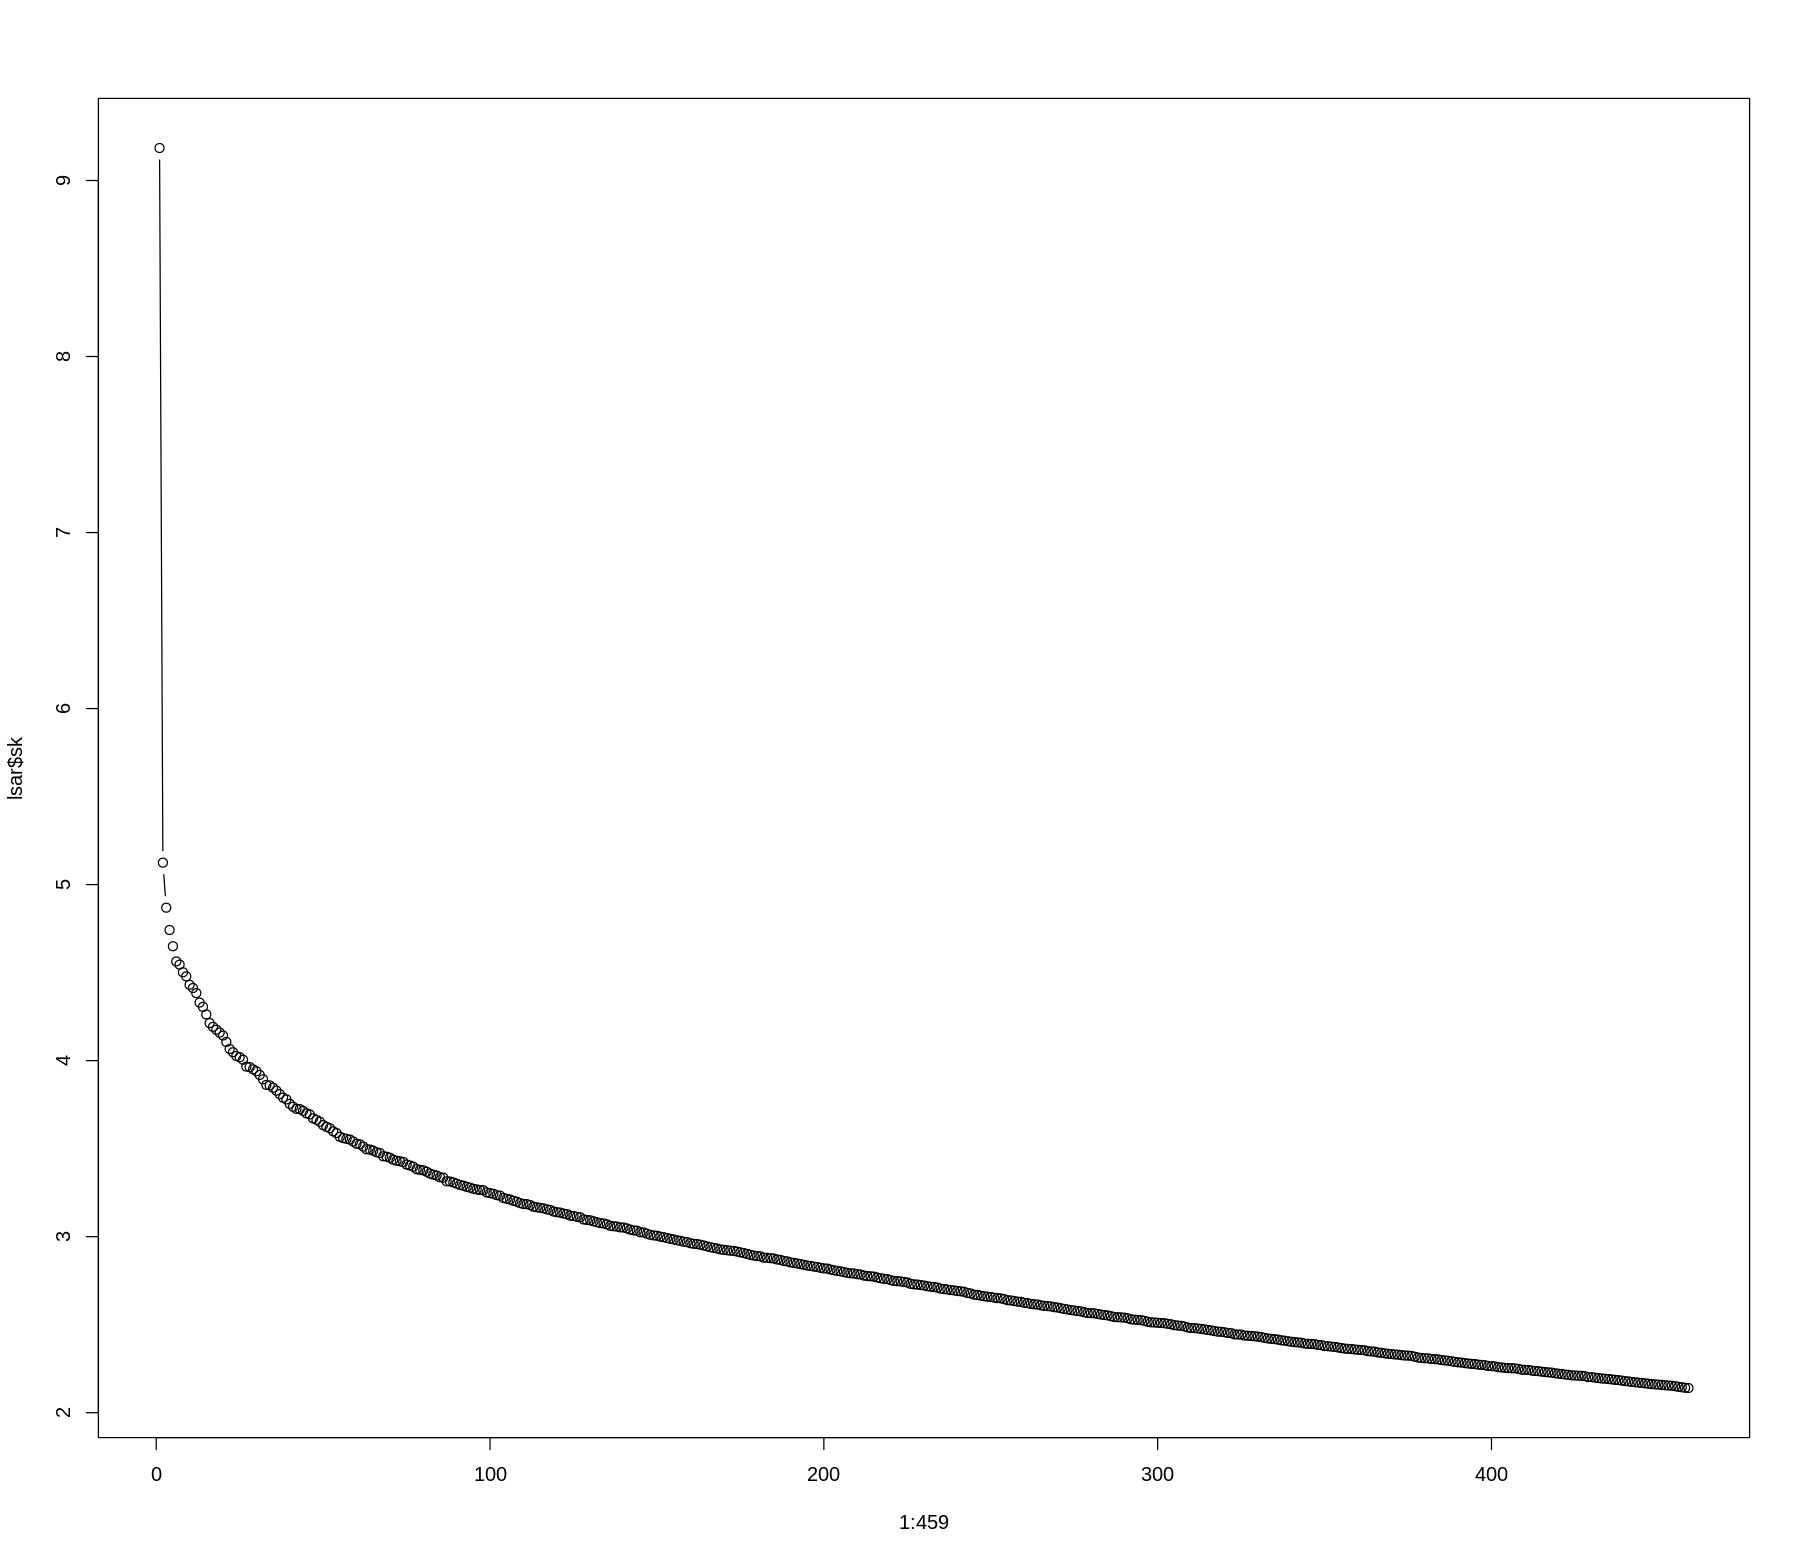

In [ ]:
# graphs of the eigenvalues computed by the SVD
plot( 1:459, lsar$sk, type="b" )

In [ ]:
# let's compute the two weighted matrices, terms and docs, of semantic similarity by the eigenvalues
tls <- lsar$tk %*% diag( lsar$sk )
dls <- lsar$dk %*% diag( lsar$sk )

In [ ]:
# compute the norm of each term
norma_termini_lsa <- apply(tls, 1, norm_vec)
# add the column of the norms to the matrix tls, we need this in the next operations
tls_norma_termini = cbind(tls, norma_termini_lsa)

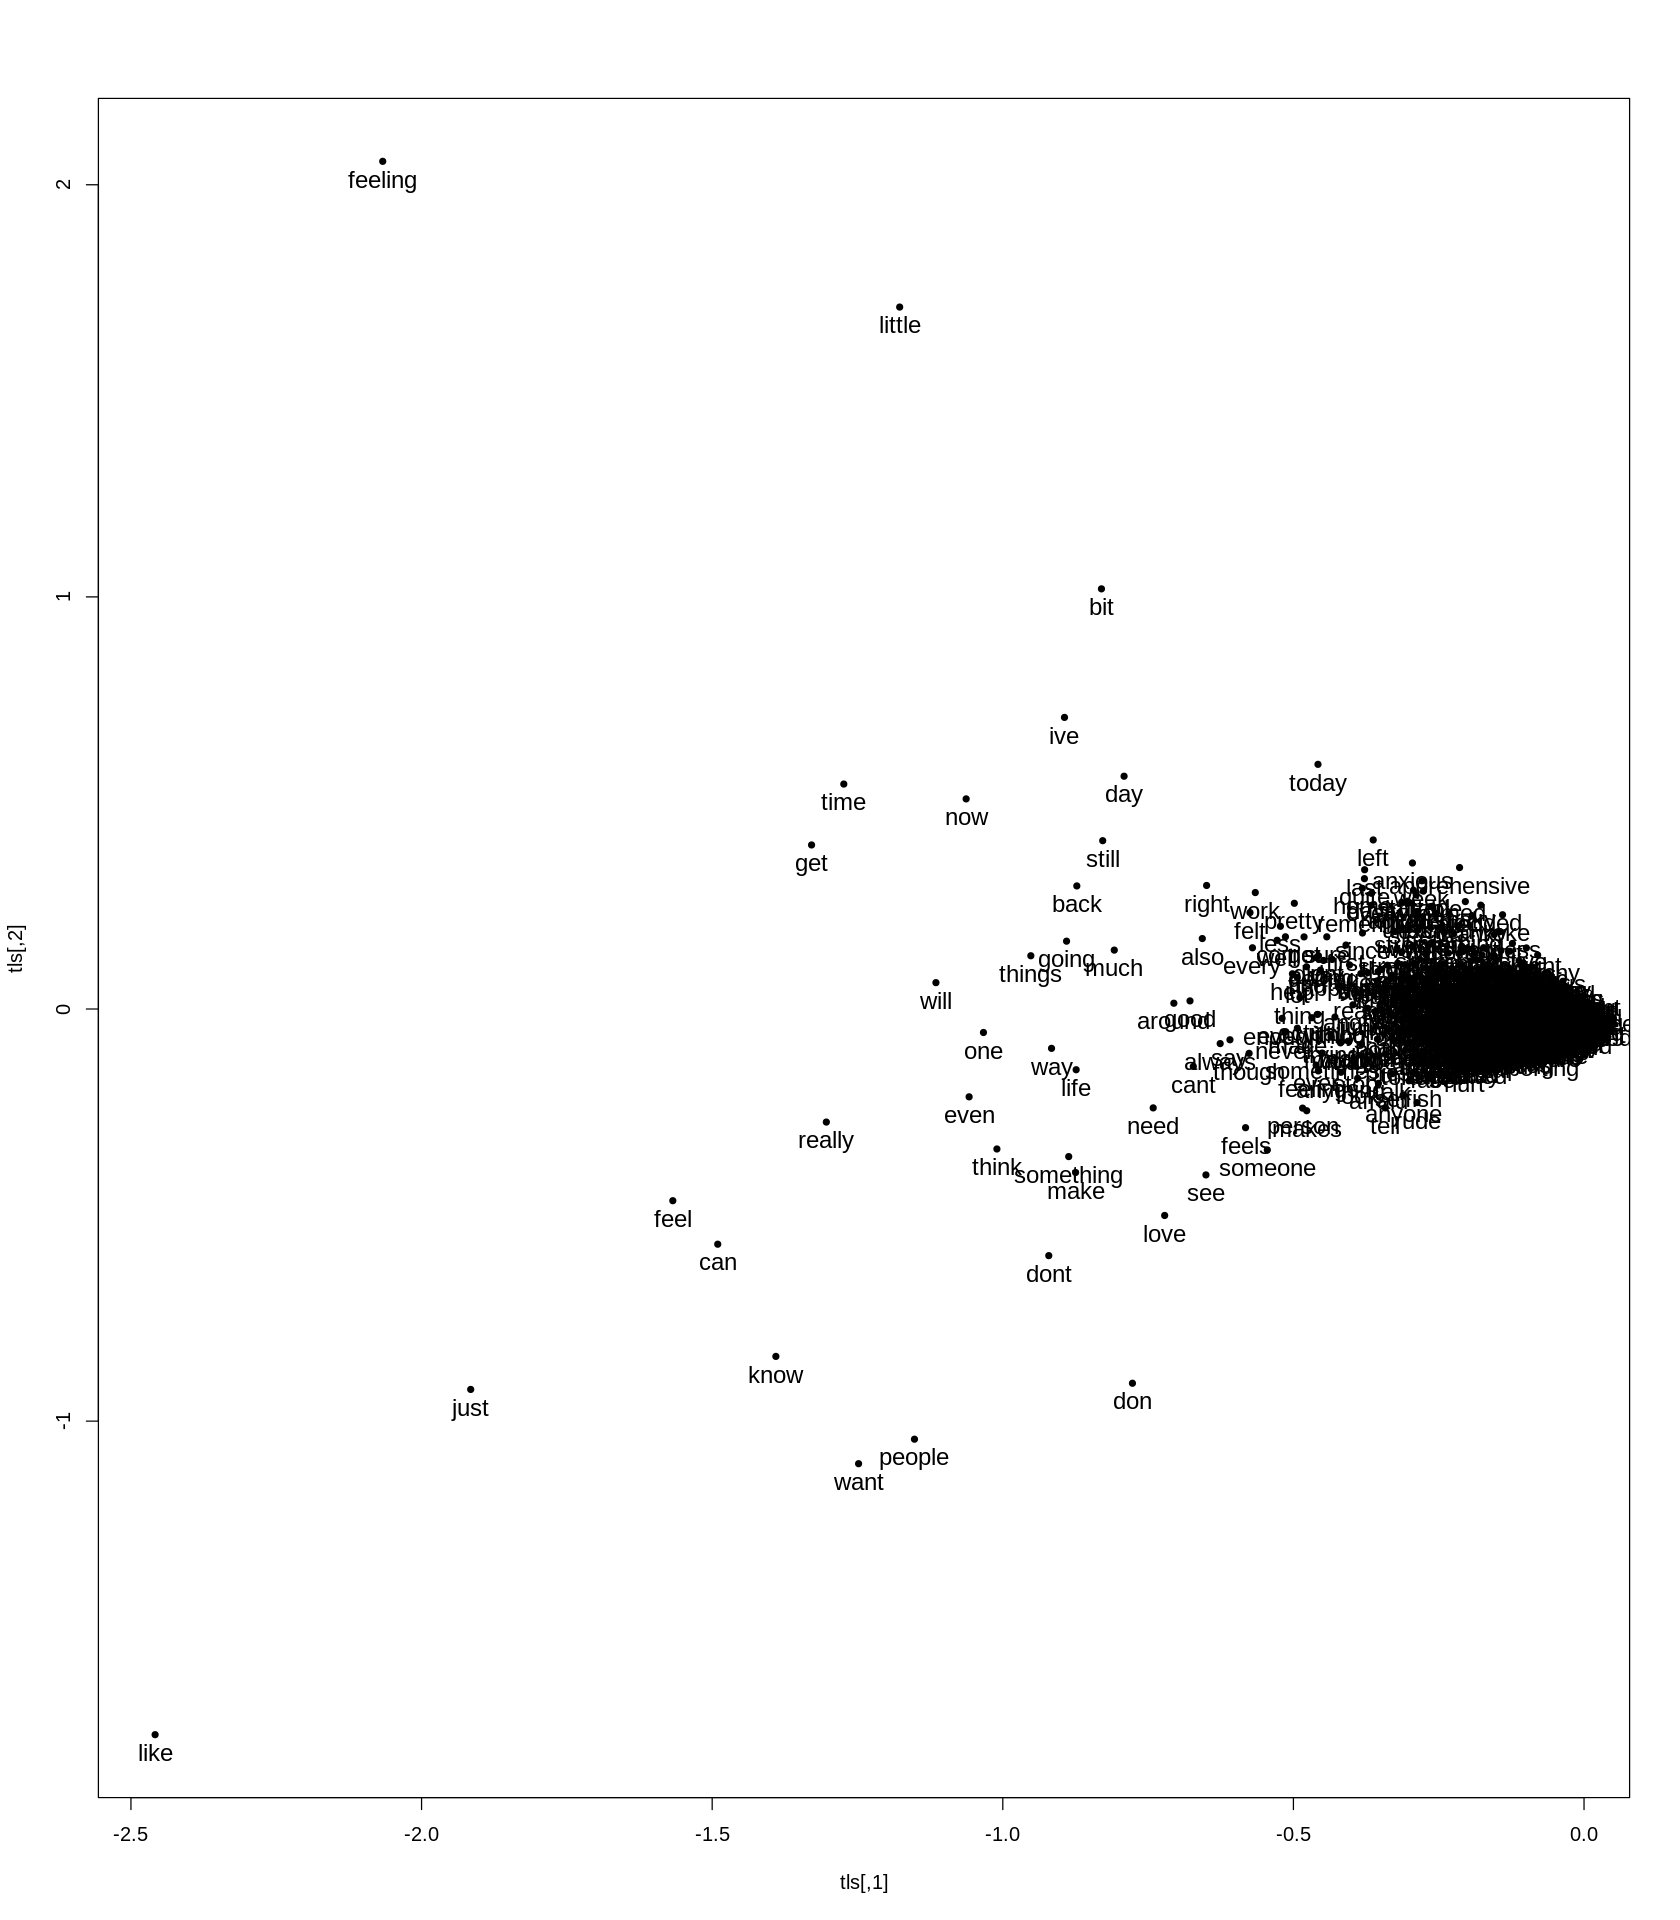

In [ ]:
# graphic representation of terms using the first two latent dimensions
options(repr.plot.width=14, repr.plot.height=16)
plot( tls, pch=20 )
text( tls, labels=words, cex=1.2, pos=1 )
## to save the picture and change its dimension uncomment dev.off() and png
#dev.off()

In [ ]:
# subset of terms with norm > 1.25 (the 460th column contains the norms)
tls_ridotto <- subset(tls_norma_termini, norma_termini_lsa > 1.25)[,-460]

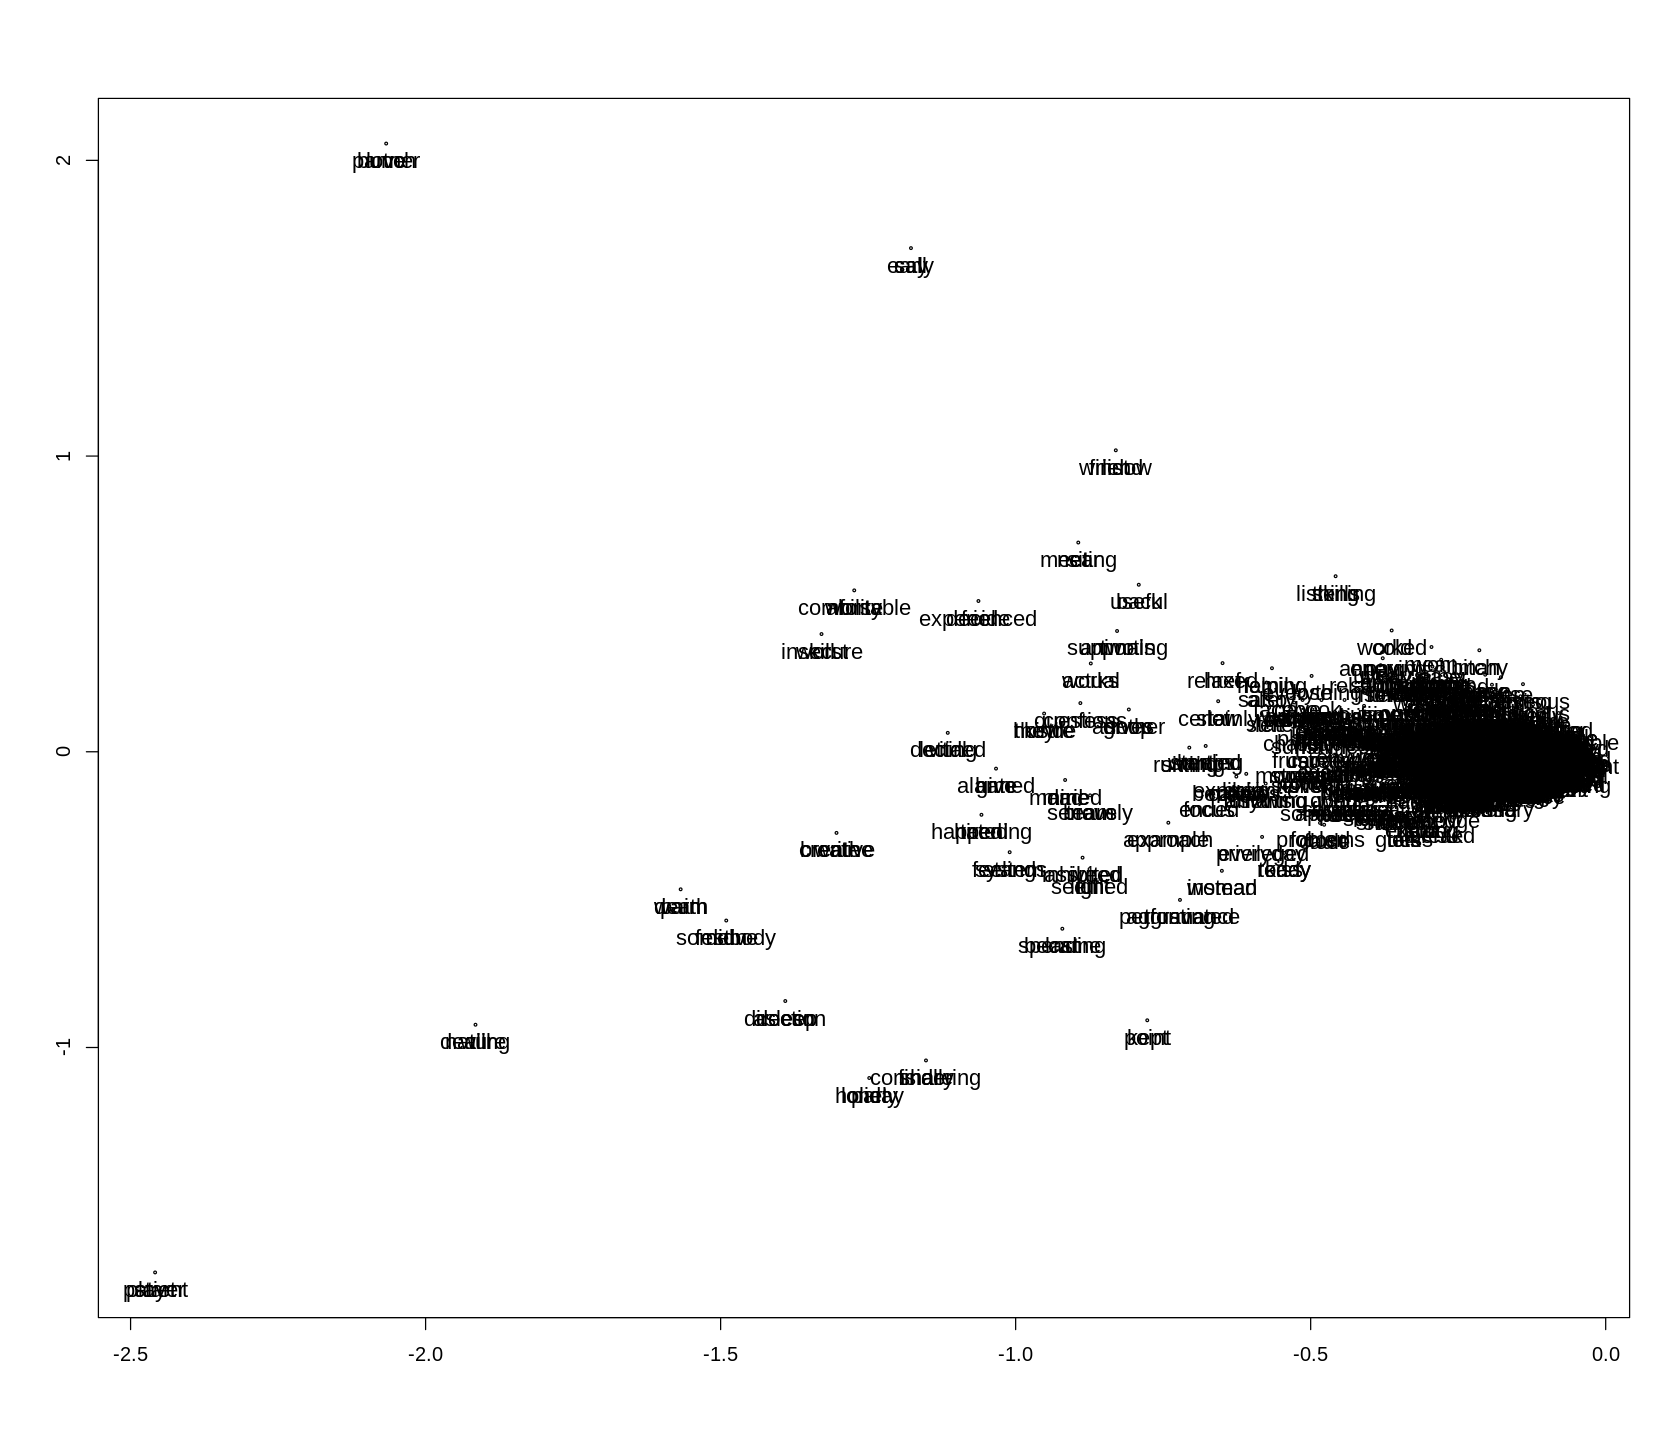

In [ ]:
# representation of this terms subset using the first two latent dimensions
options(repr.plot.width=14, repr.plot.height=12)
plot( tls_ridotto, pch=21, cex=0.3 )
text( tls_ridotto, labels=words, cex=1.1, pos=1 )
#dev.off()

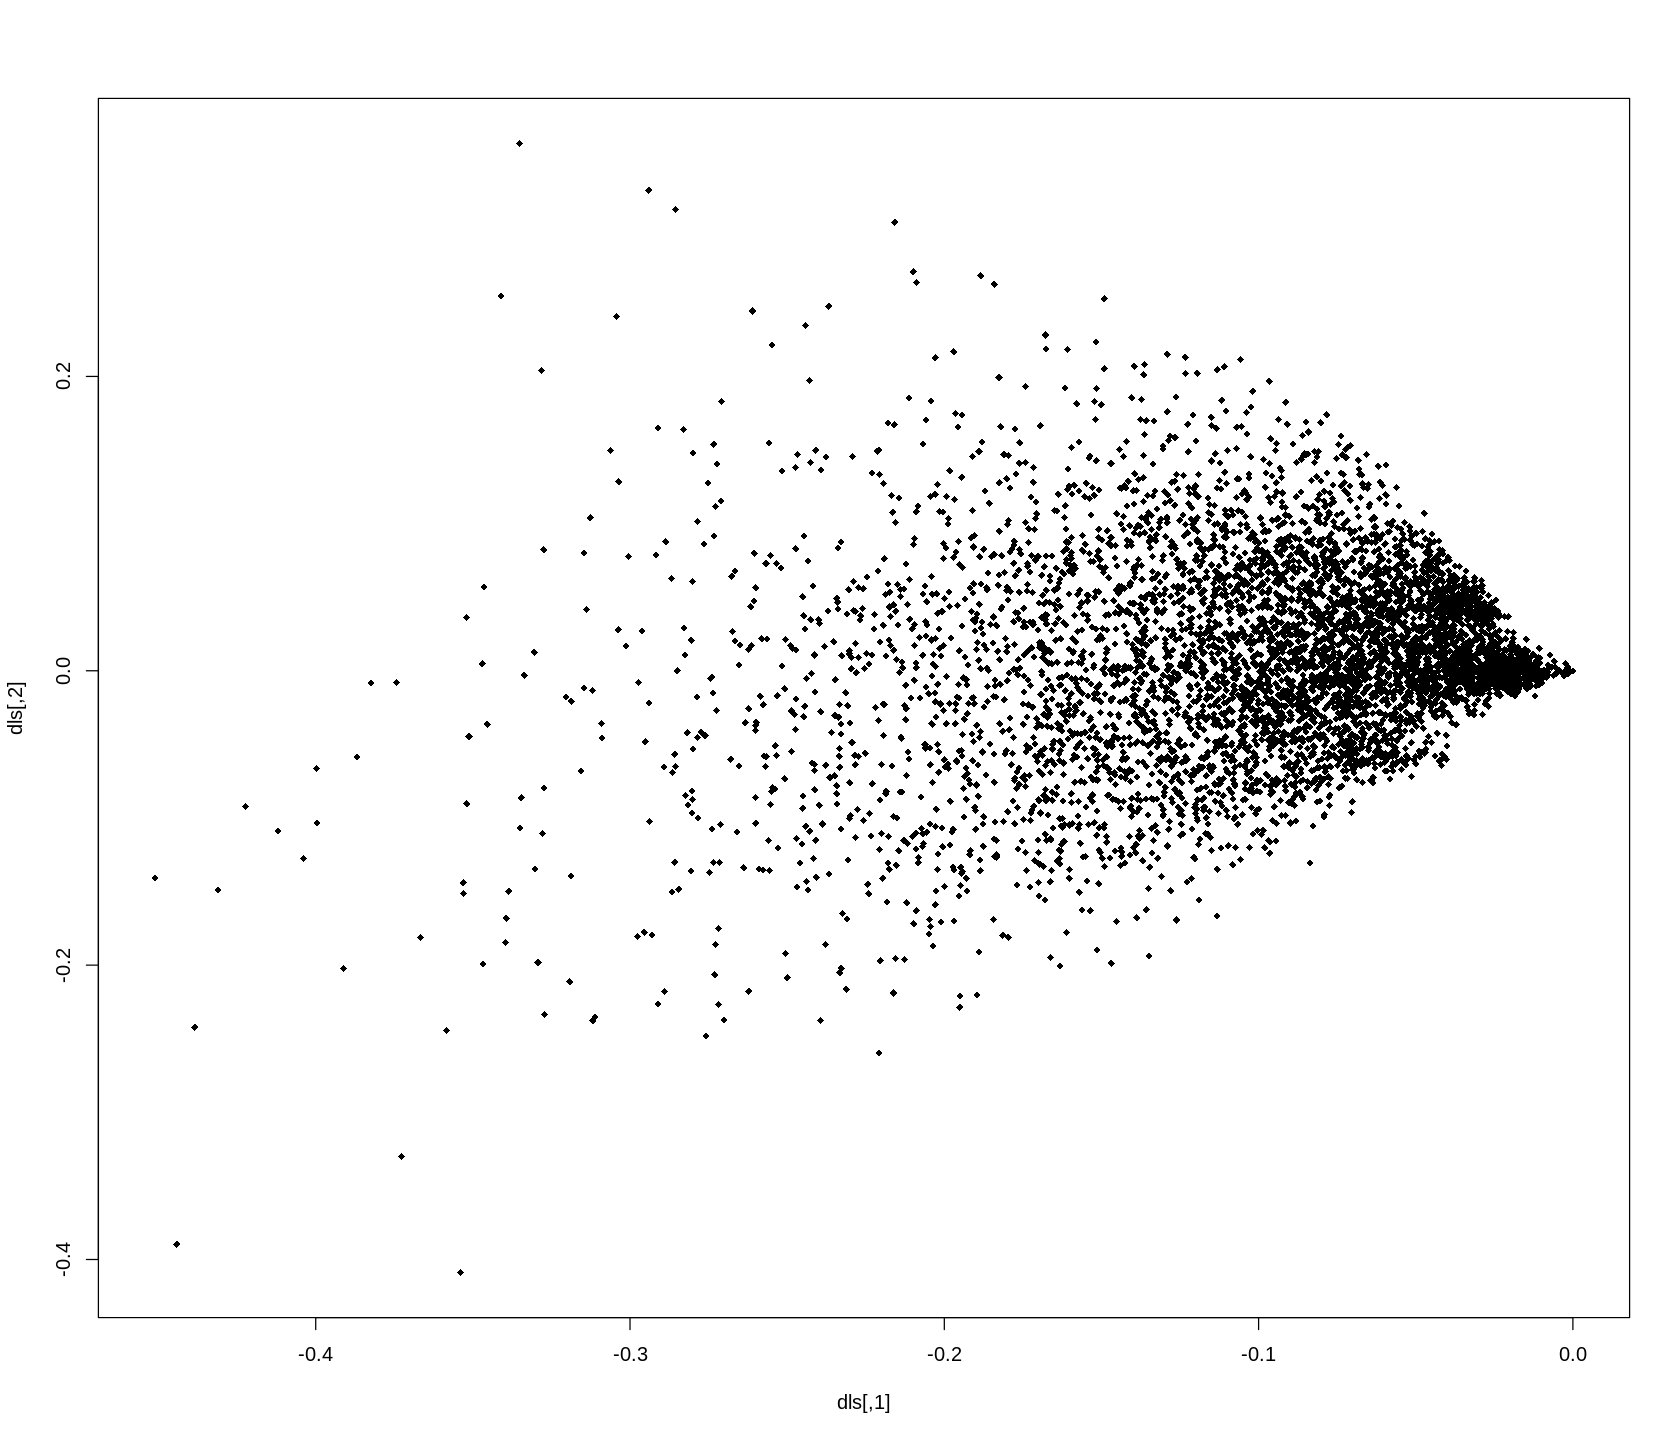

In [ ]:
# graph of the documents using the first two latent dimensions
plot( dls, pch=18, cex=0.8 )

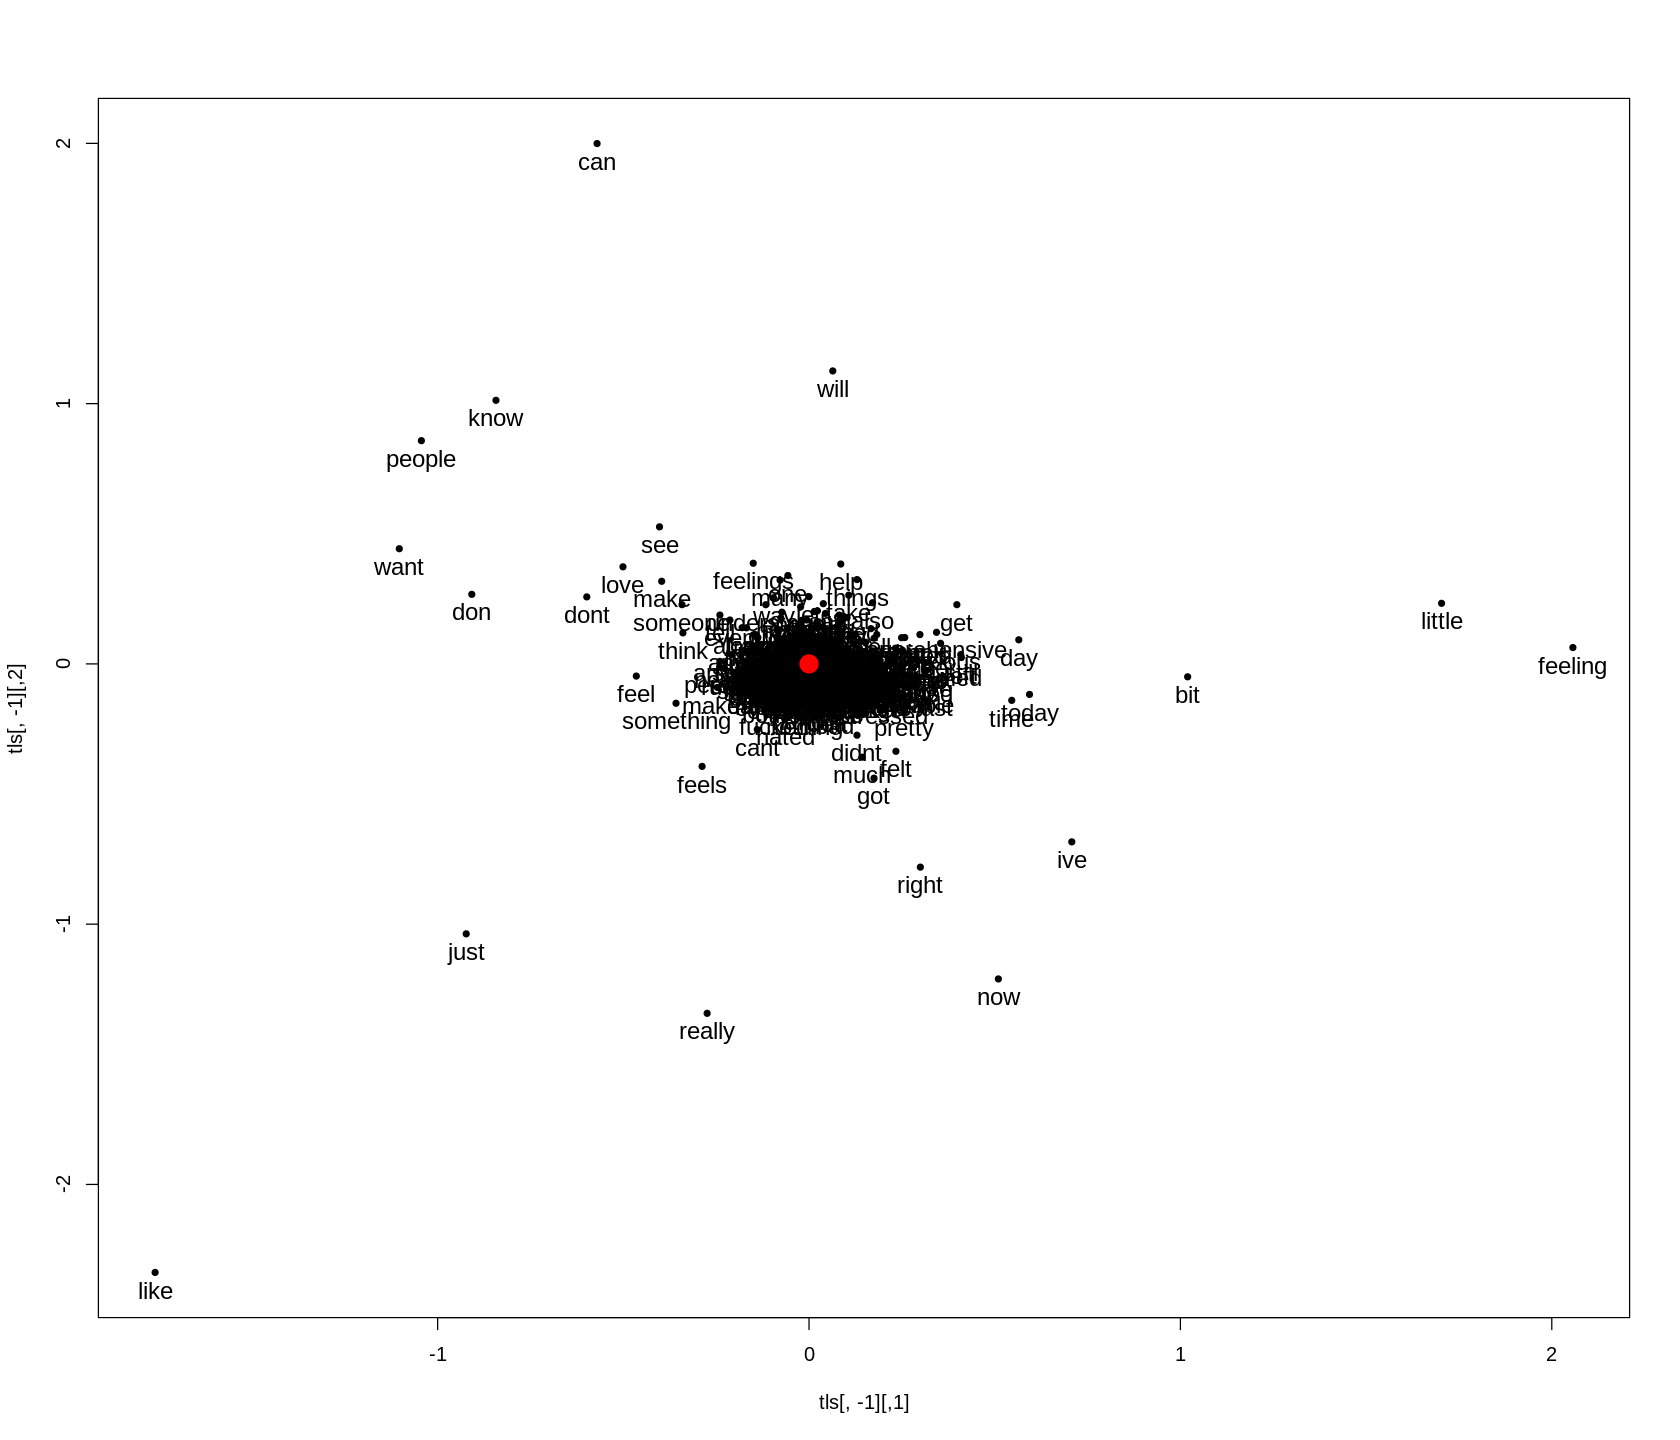

In [ ]:
# graph representation of the terms using the second and third latent variables
options(repr.plot.width=14, repr.plot.height=12)
plot( tls[,-1], pch=20 ) # -1 removes the first latent dimensions in order to display 2° and 3°
text( tls[,-1], labels=words, cex=1.2, pos=1 )
points( 0, 0, pch=20, cex=3, col="red" ) # draw the origin 0,0 of the cartesian plane
#dev.off()

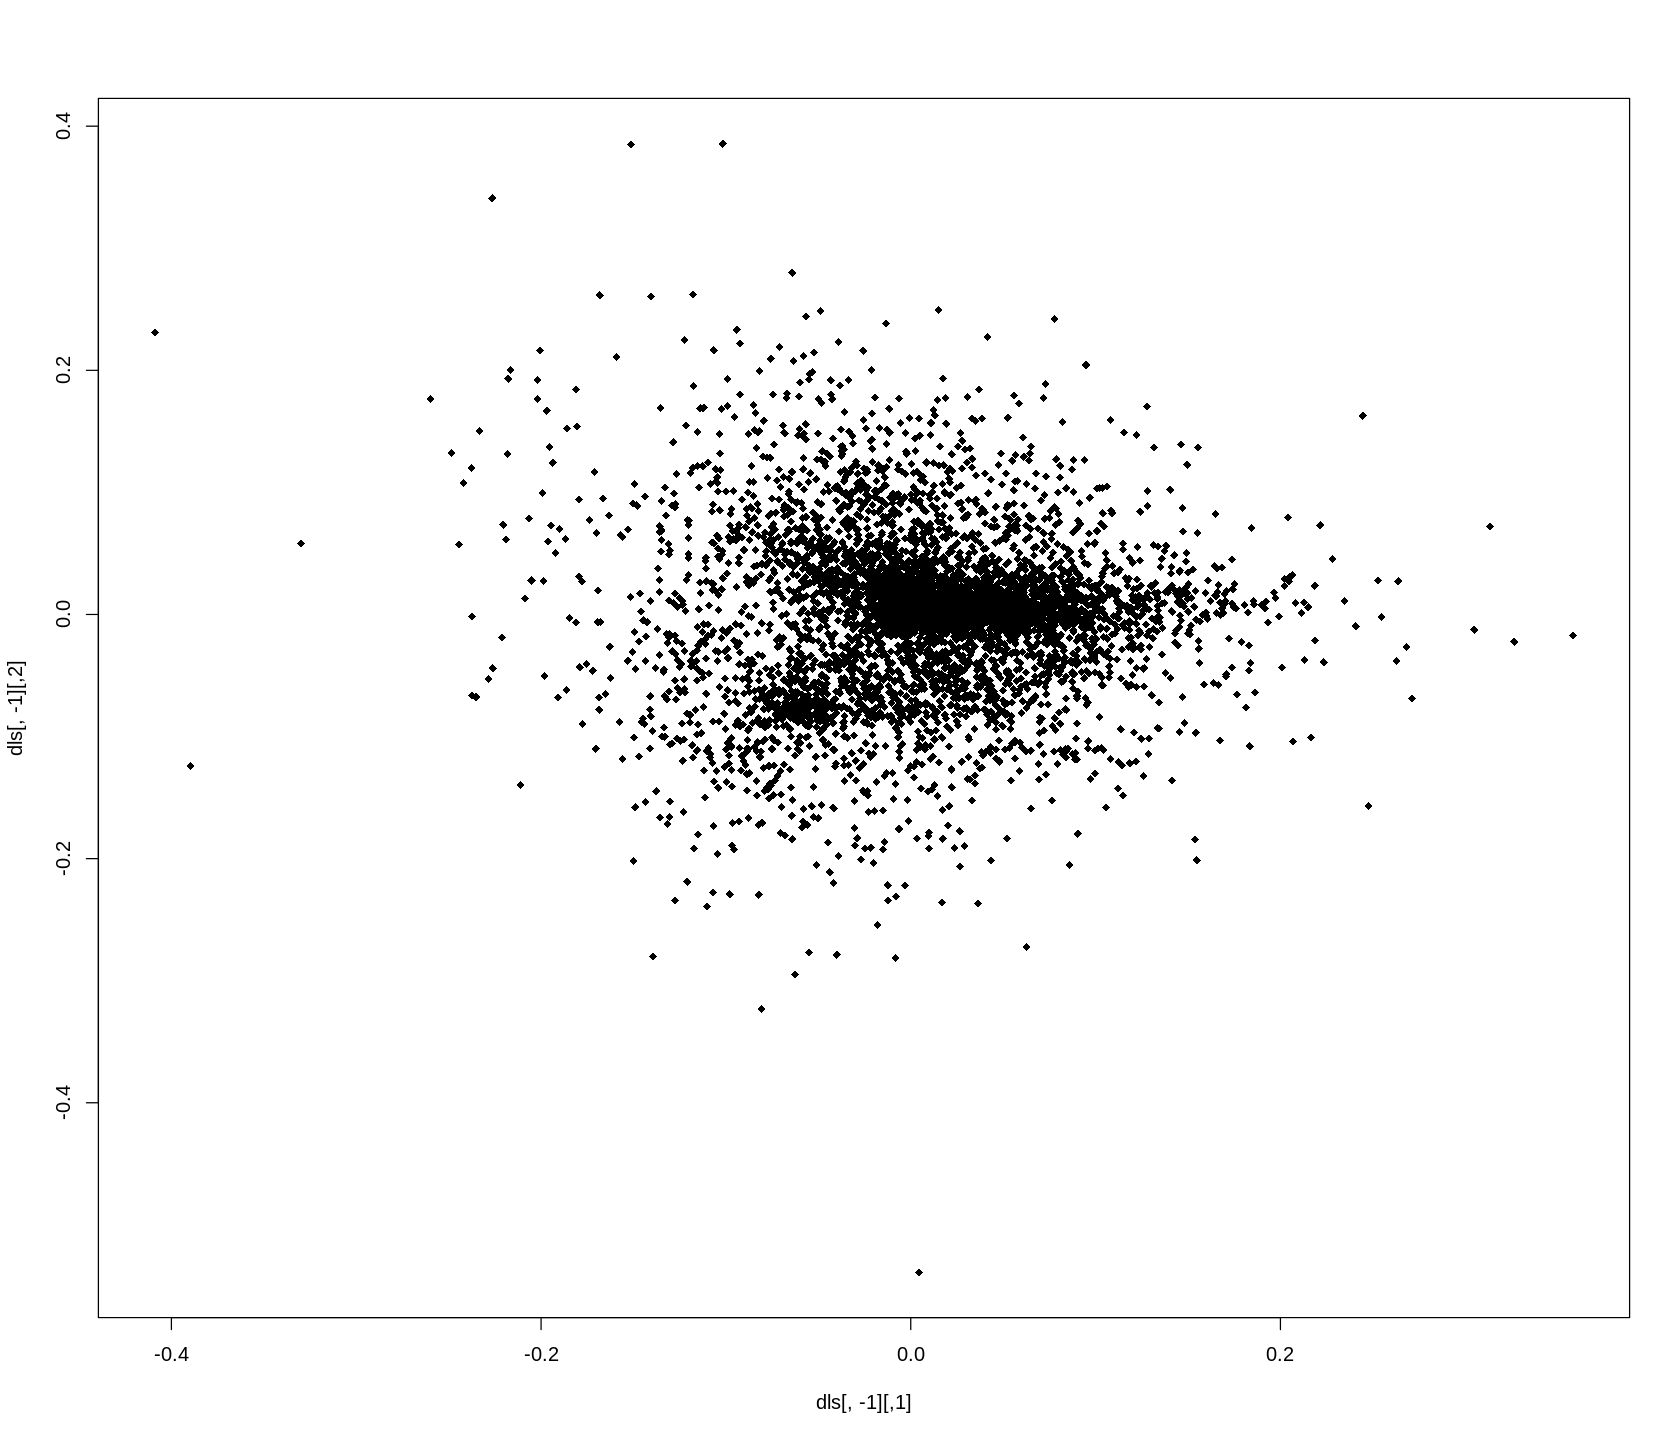

In [ ]:
# graph of docs using 2° and 3° latent dimensions
plot( dls[,-1], pch=18, cex=0.9 )

In [ ]:
# package to easily perform selection of attributes and data manipulation, among which also groupby like in SQL
install.packages('dplyr')
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”


In [ ]:
# conversion of the class names to colors in order to distinguish in the graph the accident severity of reports
emocols = as.vector(recode(sentiment, anger = "red", fear = "blue",  joy = "green") )
head(emocols)
head(sentiment)

[1] "blue"  "red"   "blue"  "green" "blue"  "red"

[1] fear  anger fear  joy   fear  anger
Levels: anger fear joy

In [ ]:
2000/5937

[1] 0.3368705

In [ ]:
summary(sentiment)

anger  fear   joy 
 2000  1937  2000

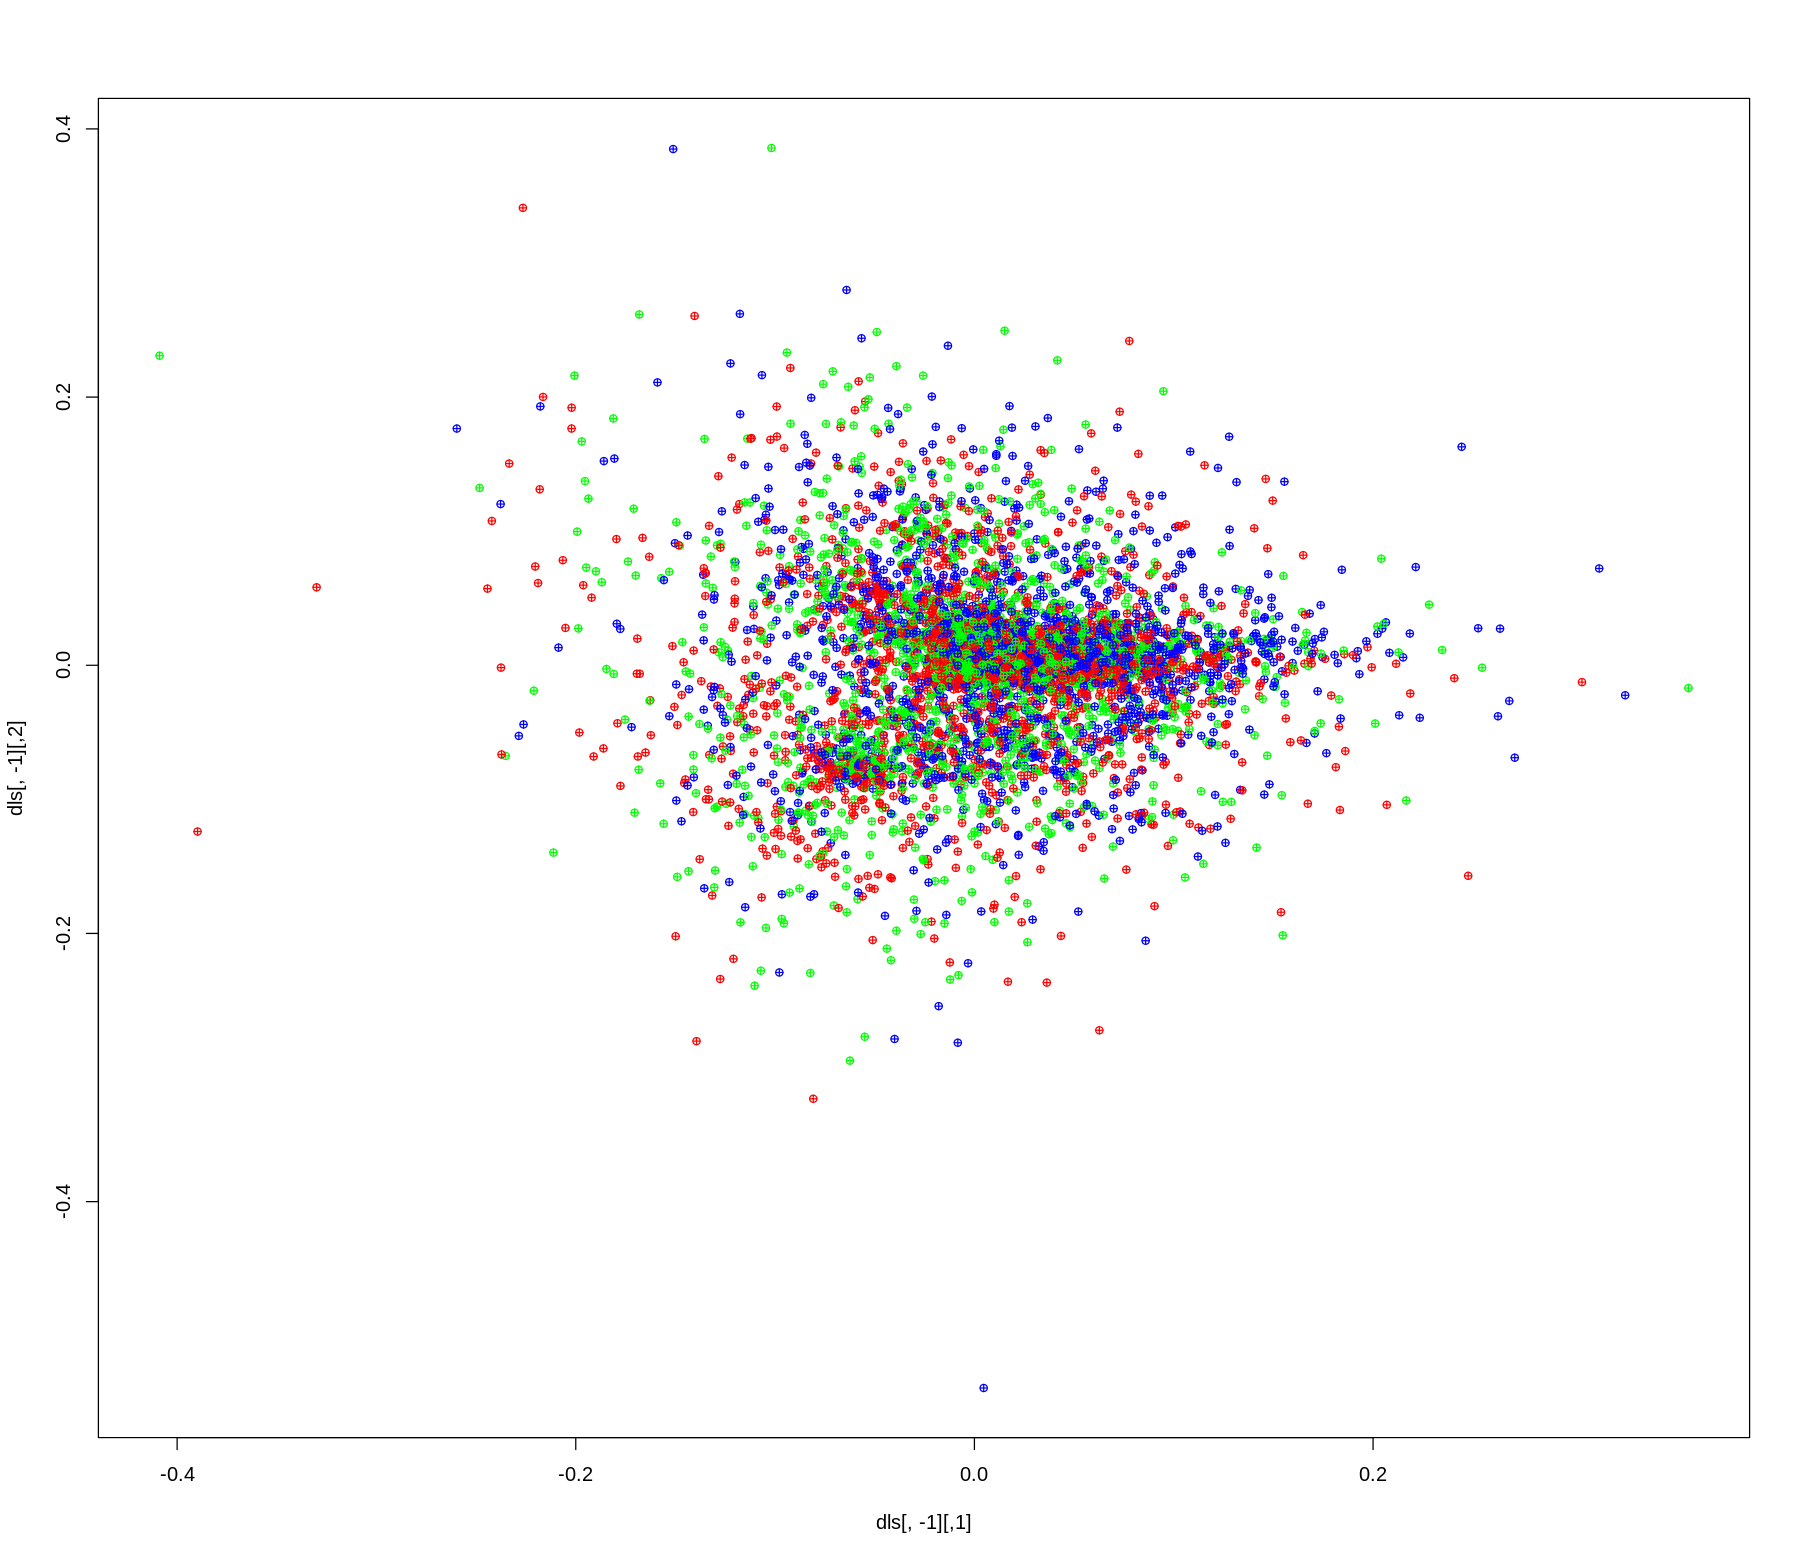

In [ ]:
options(repr.plot.width=15, repr.plot.height=13)
plot( dls[,-1], pch=10, cex=0.8, col=emocols)

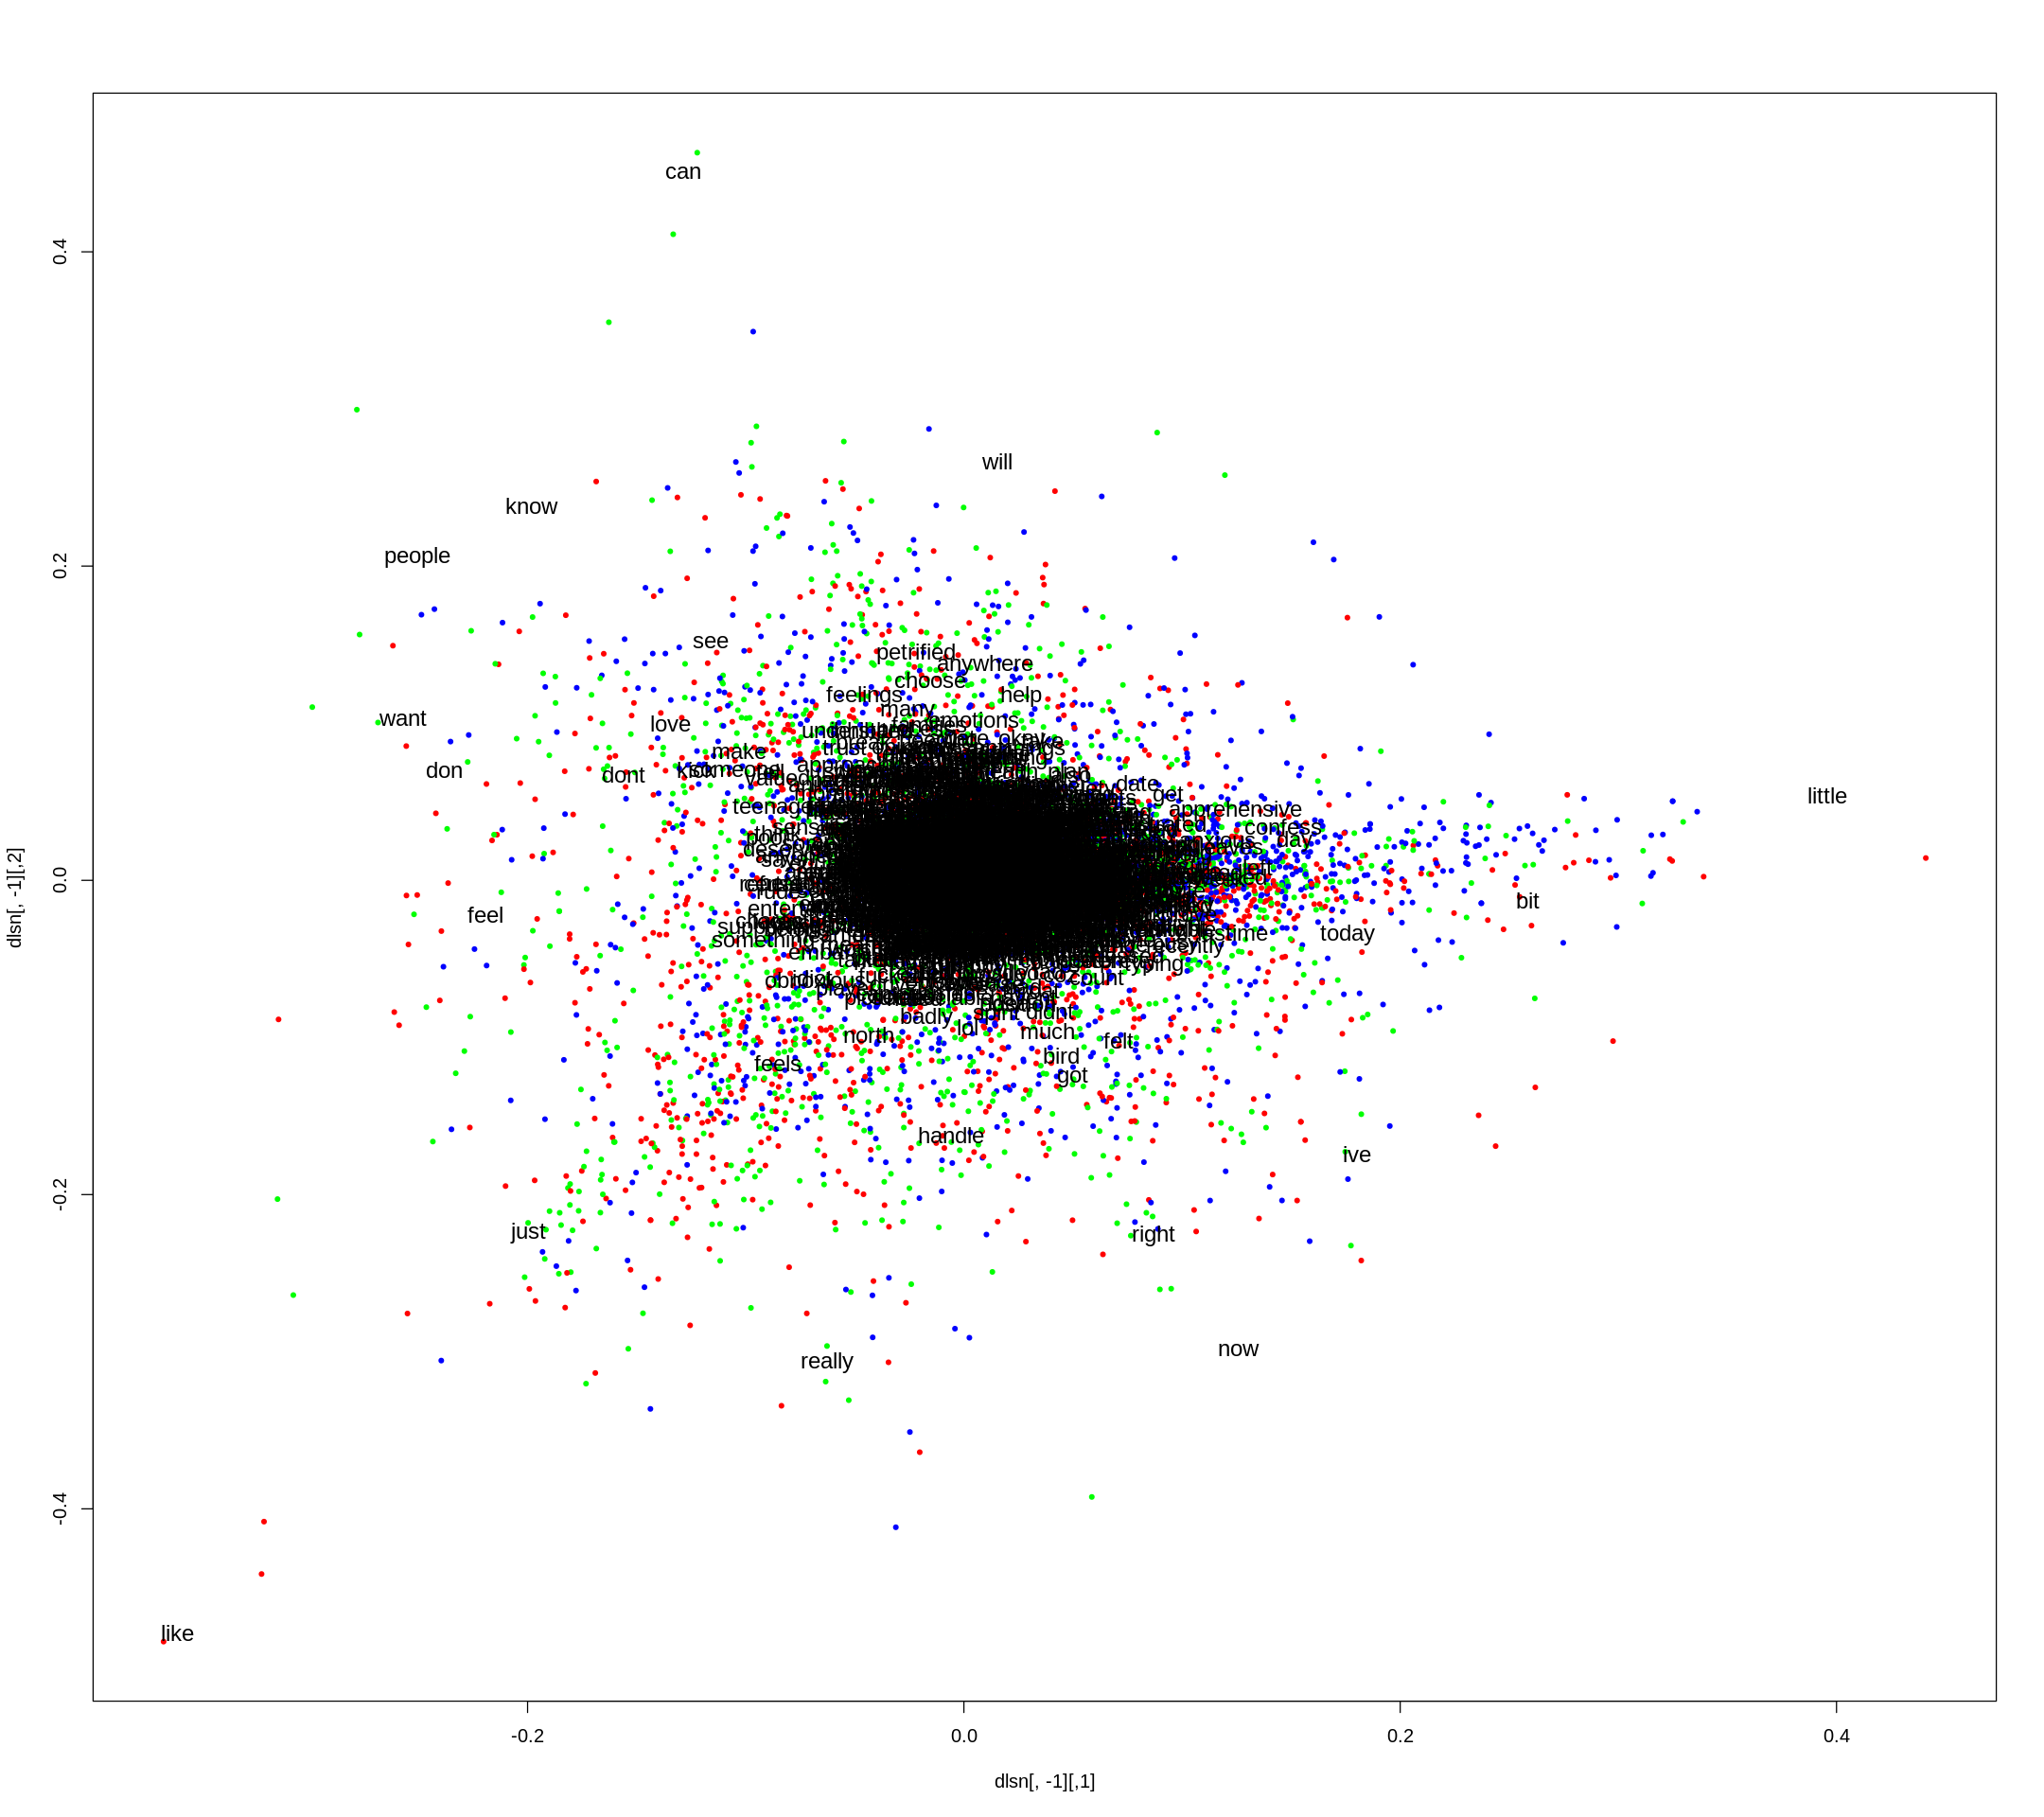

In [ ]:
#dev.off()
# definition and application of the function for the normalization of terms and docs vectors
# this ensures that vectors have a length of 1, enabling accurate comparisons of semantic similarity.
# without normalization, vectors with larger norms dominate similarity calculations, even if their directions don't align well
# in fact the vectors tls and dls are not normal because achieved by the product with sk (eigenvalues matrix)
normrows <- function(x) x / apply(x,1,norm,"2")
tlsn <- normrows(tls)
dlsn <- normrows(dls)

#By normalizing, you focus on the direction of the vectors,
# which represents the semantic meaning, ensuring that comparisons are based on meaning rather than magnitude

# new graph with normalized vectors of terms and docs
options(repr.plot.width=18, repr.plot.height=16)
plot( dlsn[,-1], pch=20, cex=0.8, col=emocols )
text( tlsn[,-1], labels=words, cex=1.2 )
points( 0, 0, pch=20, cex=5 )

In [ ]:
# the unsure term appears in the LSA space at an area with normal concentration of fear emotions
# therefore let's verify objectively if exits a lexical correlation between the term unsure and
# the fear emotions in the ORIGINAL space tdm, i.e. not-lsa. In this
# case we consider only the docs containing the term unsure.
# To perform chi analysis we use the chisquare test

# unsure.vs.fear <- table( tdm["unsure",]>0, sentiment=="fear")
# dimnames(unsure.vs.fear) <- list(unsure = c("No", "Si"), fear = c("No", "Si"))
# chisqtest = chisq.test( unsure.vs.fear, correct=FALSE )

# the function computes automatically the expected frequencies (i.e. theoretical) from the observed ones
# result: X-squared = 125.37, df = 1 (freedom degree), p-value < 2.2e-16
# namely the probability that the term weather IS NOT correlated to the destroyed accidents is 2.2e-16

# chisqtest


	Pearson's Chi-squared test

data:  unsure.vs.fear
X-squared = 125.37, df = 1, p-value < 2.2e-16


In [ ]:
# expected values and observed values from the chisquare test
# chisqtest$expected
# chisqtest$observed # 2000+54=482  fear reports

fear
unsure No         Si        
    No 3957.55432 1916.44568
    Si   42.44568   20.55432

      fear
unsure   No   Si
    No 3999 1875
    Si    1   62

In [ ]:
# the love term appears in the LSA space at an area with a little unusual concentration of joy
# verify objectively if exits a lexical correlation between the term love and
# the destoryed accidents in the ORIGINAL space tdm, i.e. not-lsa. In this
# case we consider only the docs containing the term love.
# To perform thi analysis we use the chisquare test
love.vs.joy <- table( tdm["love",]>0, sentiment=="joy")
dimnames(love.vs.joy) <- list(love = c("No", "Si"), joy = c("No", "Si"))
chisqtest = chisq.test( love.vs.joy, correct=FALSE )

# the function computes automatically the expected frequencies (i.e. theoretical) from the observed ones
# result: X-squared = 4.3159, df = 1 (freedom degree), p-value < 2.2e-16
# namely the probability that the term weather IS NOT correlated to the destroyed accidents is 2.2e-16
chisqtest


	Pearson's Chi-squared test

data:  love.vs.joy
X-squared = 4.3159, df = 1, p-value = 0.03776


In [ ]:
# expected values and observed values from the chisquare test
chisqtest$expected
chisqtest$observed # 2000+56=2056  joy reports

joy
love No         Si        
  No 3848.80377 1955.19623
  Si   88.19623   44.80377

    joy
love   No   Si
  No 3860 1944
  Si   77   56

In [ ]:
# let's find the semantically closest term to love in the LSA space
associate(tls[,2:3], "love", threshold=0.8)
# from the result it emerges that the term life is the second semantically closest to
# love, but it is the first with the highest norm, therefore we select life as first term associated
# to love

safety          life        hearts     important           fab 
    0.9999999     0.9999965     0.9999902     0.9999901     0.9999852 
       public          hurt          live         needs          rich 
    0.9999831     0.9999770     0.9999695     0.9999643     0.9999030 
       valued        system        afraid       special     disgusted 
    0.9998841     0.9998794     0.9998554     0.9998383     0.9998259 
         stop     delighted          tell       actions           eye 
    0.9997648     0.9997645     0.9997195     0.9996922     0.9996163 
          old          even      violence         using          make 
    0.9995764     0.9995675     0.9995337     0.9994056     0.9993934 
  information       treated         tears        people          look 
    0.9992677     0.9991267     0.9991257     0.9988554     0.9987604 
    wonderful       someone       control       learned    throughout 
    0.9986265     0.9985999     0.9985900     0.9985674     0.9984018 
      neither           buy      faithful     genuinely      problems 
    0.9983503     0.9981737     0.9980978     0.9980120     0.9979784 
        cause         moral          hold         front          ways 
    0.9978071     0.9975745     0.9974706     0.9973876     0.9966629 
       nature          pain  appreciative        expect          face 
    0.9962313     0.9960728     0.9959817     0.9948396     0.9938223 
          bus          wont      daughter    connection          kick 
    0.9937997     0.9936606     0.9934291     0.9932400     0.9929806 
          die         issue      everyone       lessons       animals 
    0.9925837     0.9925797     0.9924056     0.9916553     0.9914478 
         onto        theres       sincere        joyful        issues 
    0.9912060     0.9909614     0.9909213     0.9905960     0.9903218 
  environment         comes       popular     obviously           met 
    0.9897169     0.9895567     0.9890449     0.9889102     0.9887710 
      respect      teenager         works        couldn       wronged 
    0.9884835     0.9883584     0.9883188     0.9875518     0.9873983 
          sex          self          true     pressured     sensitive 
    0.9873151     0.9871095     0.9864258     0.9858315     0.9854711 
      hateful        giving    especially         loved      powerful 
    0.9852241     0.9844972     0.9827122     0.9820700     0.9819547 
         pull          shop       clothes          weak      anything 
    0.9818148     0.9811219     0.9810346     0.9808213     0.9792340 
        laugh        family           mom          else          join 
    0.9789628     0.9783479     0.9770052     0.9763608     0.9762746 
        jesus         allow         punch        rarely          cool 
    0.9759905     0.9759476     0.9755081     0.9753699     0.9732281 
         dont         avoid        follow          kids          know 
    0.9728147     0.9728083     0.9725085     0.9721527     0.9721247 
          rid        pieces    threatened       charmed         faith 
    0.9715478     0.9711145     0.9710303     0.9695234     0.9692834 
     gorgeous           isn          song      offended     different 
    0.9688837     0.9687930     0.9684668     0.9684323     0.9679822 
         rule       stories          want          meet        actual 
    0.9676619     0.9673849     0.9667661     0.9655728     0.9643451 
uncomfortable      approach       letting           see      somebody 
    0.9622525     0.9620413     0.9617992     0.9615817     0.9613514 
    difficult     beautiful          guys    personally         total 
    0.9608568     0.9608424     0.9602665     0.9599812     0.9593795 
          won         think         light         women       parents 
    0.9562471     0.9545577     0.9545473     0.9530637     0.9503604 
        stand          fuck        scream      terribly          easy 
    0.9501015     0.9495097     0.9485608     0.9478396     0.9473711 
         shit          mind    

In [ ]:
# let's verify if also the couple "love life" is objectively correlated to joy emotion
# in the ORIGINAL space tdm, namely if there is lexical correlation as in the previous case.
loli.vs.joy <- table( tdm["life",]>0 & tdm["love",]>0, sentiment=="joy" )
dimnames(loli.vs.joy) <- list(love_life = c("No", "Si"), joy = c("No", "Si"))
chisqtest = chisq.test( loli.vs.joy, correct=FALSE )
# results: X-squared = 0.41966, df = 1, p-value = 0.5171
# namely the probability that the couple of the terms love life IS NOT lexically correlated
# to joy emotion is  0.5171
chisqtest

Warning message in chisq.test(loli.vs.joy, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  loli.vs.joy
X-squared = 0.41966, df = 1, p-value = 0.5171


In [ ]:
# le'ts repeat the analysis in the LSA space, to evaluate if there exists SEMANTIC correlation
#  between the couple of terms "love life" and the joy emotion.
# In this case the considered docs could also not contain the two terms, but they may contain
# semantically correlated terms to them.
# To peform this analysis let's transform the query "love life" in a doc and do the fold_in in the
# LSA spaces
lilo <- "love life" #document vector
lilov<- query( lilo, words )
liloe<- lw_logtf(lilov) * ( 1-entropy(tdm) )
lilos<- t(liloe) %*% lsar$tk
lilos #represents the query in the LSA space

[,1]        [,2]        [,3]       [,4]        [,5]       [,6]       
LOVE LIFE -0.05103689 -0.03804139 0.02984904 -0.03551761 0.01966983 -0.00295818
          [,7]        [,8]        [,9]        [,10]       [,11] [,12]       
LOVE LIFE -0.05665928 -0.07199935 -0.06057725 -0.05178899 ⋯     -0.003869975
          [,13]      [,14]       [,15]        [,16]       [,17]       
LOVE LIFE 0.01237525 -0.01471886 -0.007000018 0.006248986 -0.002834986
          [,18]       [,19]        [,20]        [,21]      
LOVE LIFE 0.009665828 0.0004189656 -0.002447467 0.005012734

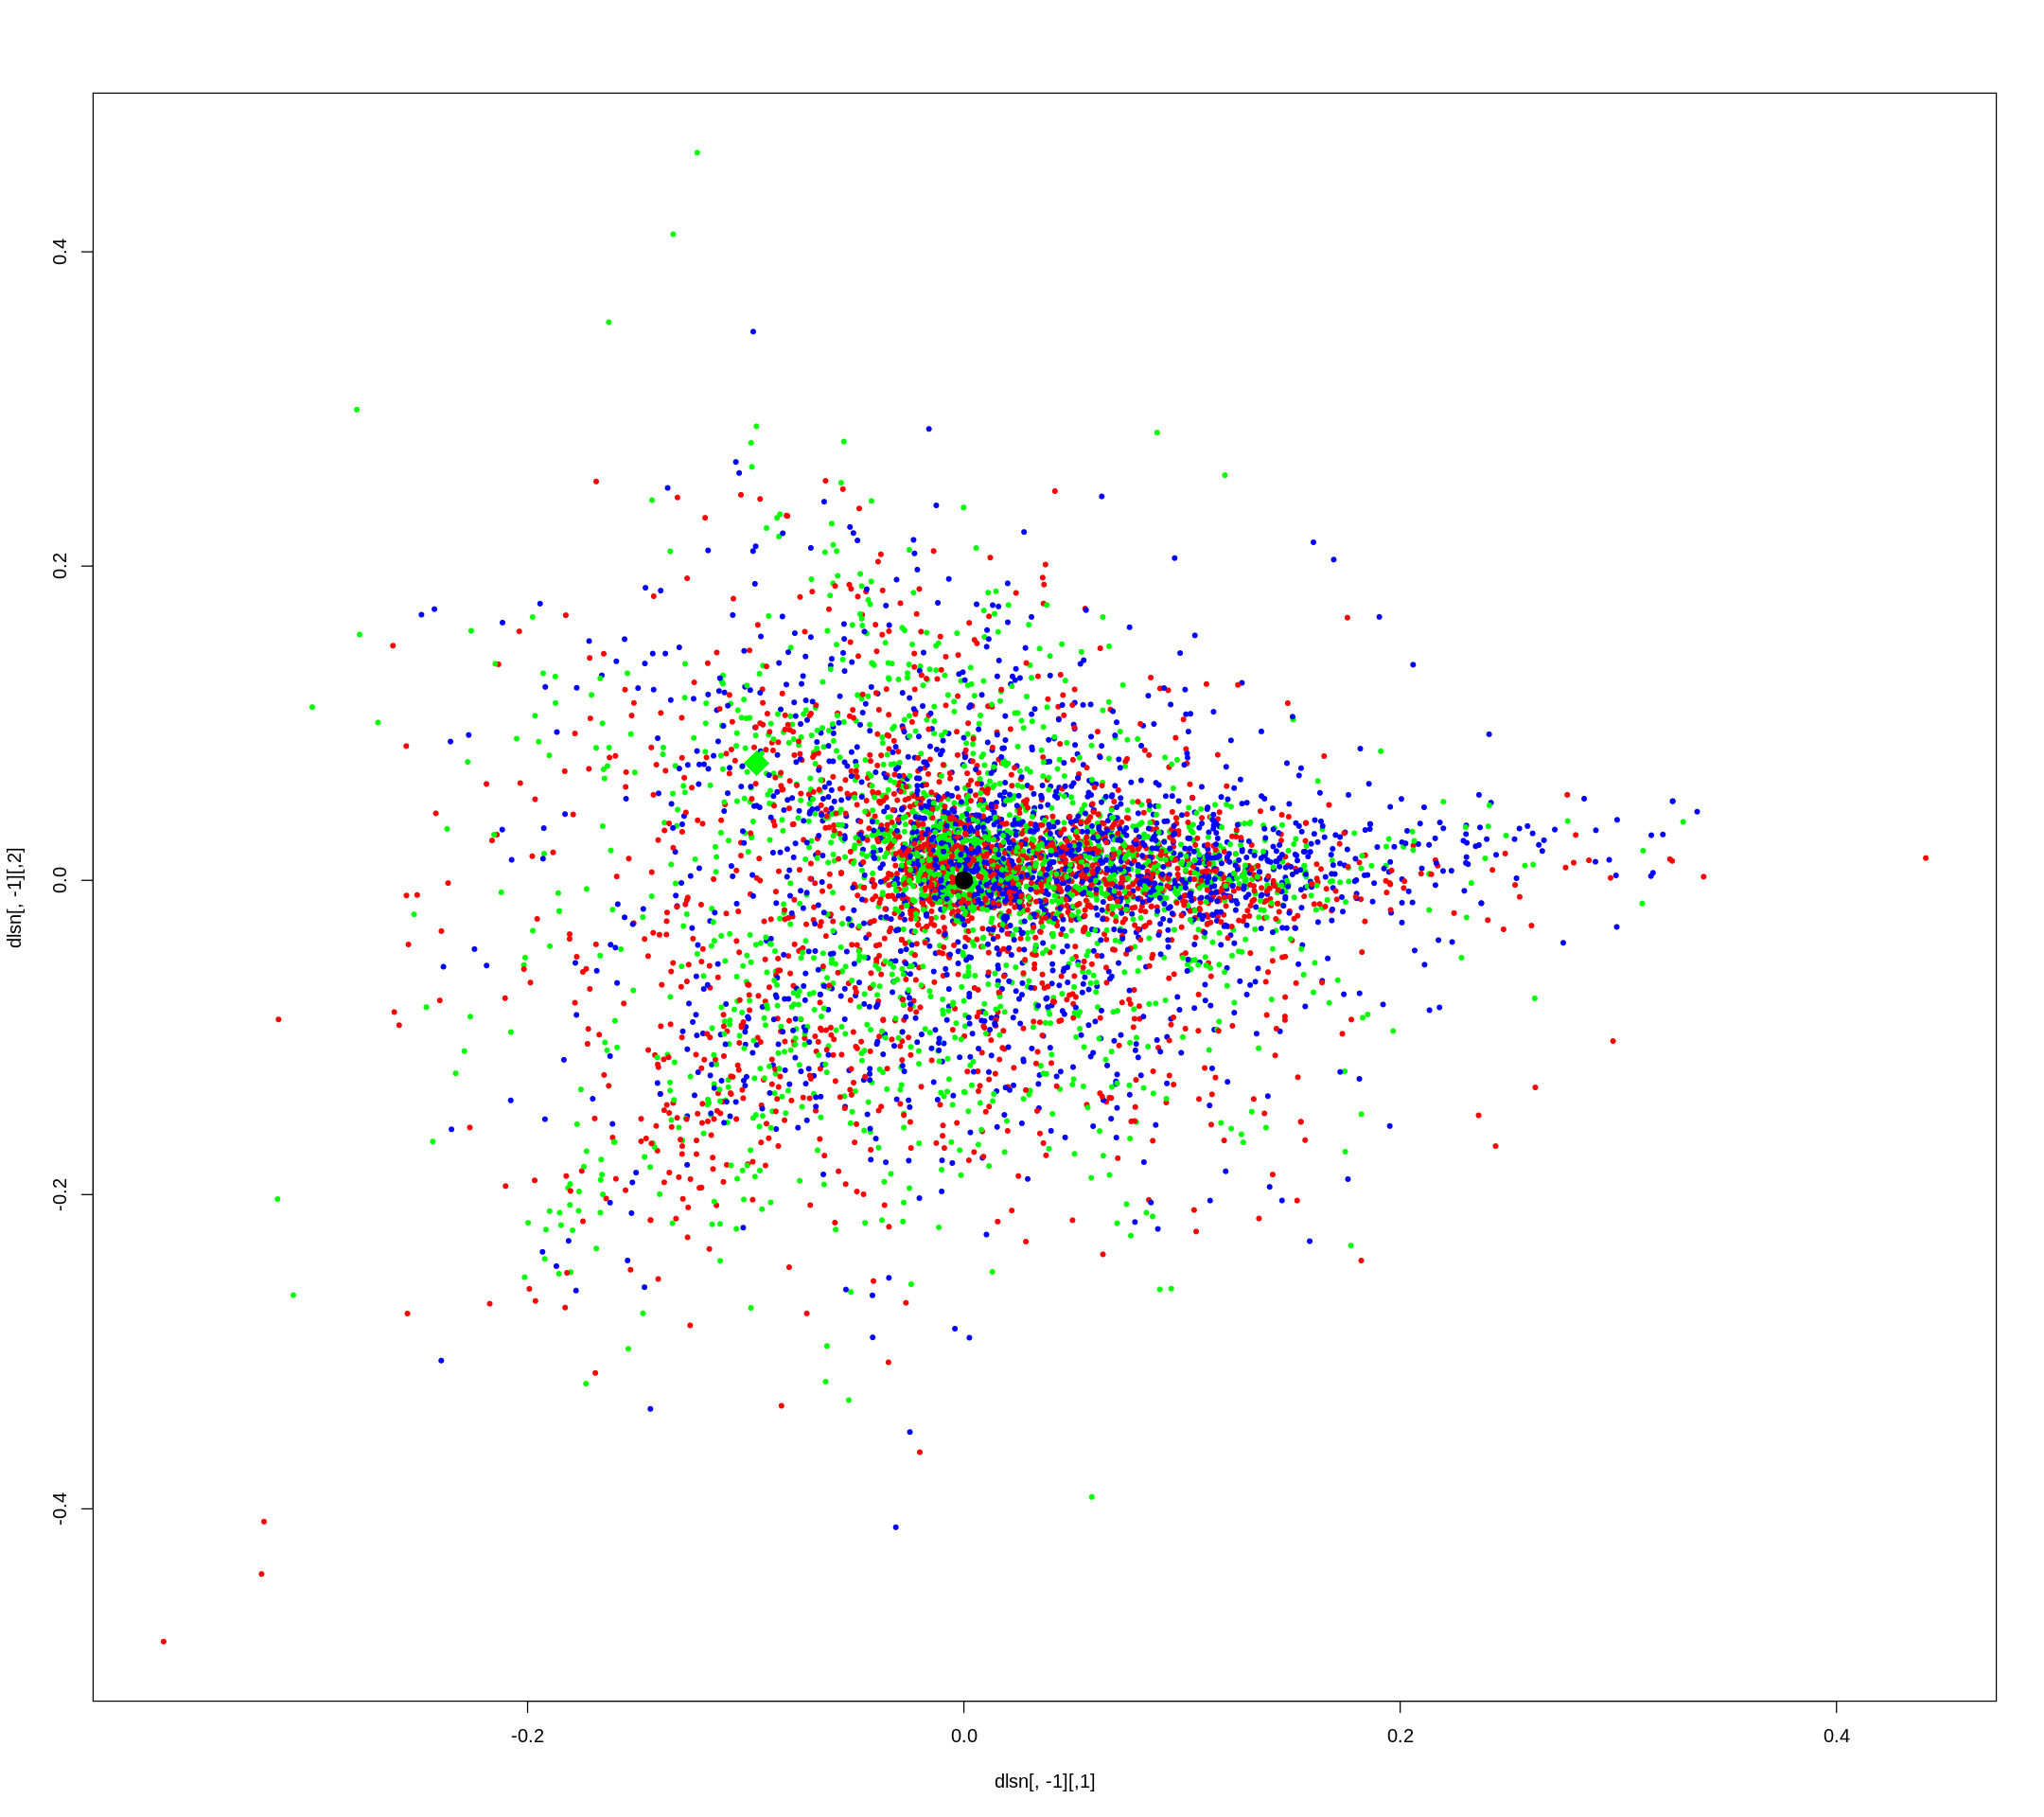

In [ ]:
# graph of the terms and docs in the LSA space using the dimensions 2 and 3
plot( dlsn[,-1], pch=20, cex=0.8, col=emocols )
# text( tlsn[,-1], labels=words, cex=0.8 )
points( 0, 0, pch=20, cex=3 )  # display the origin 0,0 of the graph
lilosn <- normrows( lilos ) # vector query normalization
points(lilosn[2],lilosn[3],cex=3,pch=18,col="green") # display of the query in the graph

In [ ]:
# definizione funzione che restituisce un vettore con le similarità coseno tra il vettore Q
# e le righe della matrice X
cosines <- function(X, Q) apply( X, 1, cosine, as.vector(Q) )
# definizione funzione che restituisce gli indici (i.e. posizioni) degli N valori più elevati in X
top <- function(X, N) order( X, decreasing=TRUE )[1:N]


In [ ]:
# indice dei 10 documenti che risultano semanticamente piu' simili alla query "life love"
# considerando solo la dimensione 2 e 3
top( cosines( dls[,2:3], lilos[2:3] ), 10 )
# elenco dei 10 documenti sopra menzionati
tweets[top(cosines(dls[,2:3], lilos[2:3]), 10)]
# tra i documenti ci sono rapporti dove la causa non e' sempre legata alle condizioni meteo,
# e.g. ""
# due sole dimensioni LSA la perdita d'informazione e' significativa

# ???


[1] 3133 4360 2018  858   18 3903 3552 5463 1996 2218

[1] "i feel afraid but i have learned to allow myself to be afraid"                                                                                
 [2] "i realised i only hate people because i feel threatened by them"                                                                              
 [3] "im just feeling so fucked up nothing can cheer me up"                                                                                         
 [4] "i don t know why it is that i feel awkwardly hesitant to return to melbourne"                                                                 
 [5] "i feel offended i choose to tell you guys how i feel because i treated you guys as friends and would want to put a stop to all these nonsense"
 [6] "i do feel slighted when some people use their piece of the cyber world to be rude towards me"                                                 
 [7] "id love to hear how any of you handle these types of situations as well so if you have any stories of your own feel free to share"            
 [8] "i just want to show them that i can take care of myself and i feel wronged by staying with them"                                              
 [9] "i know the pain parents feel when an enraged child becomes violent"                                                                           
[10] "i want every woman to feel the kind of love from god that sheri shares in her letters from the king and i am positive that she does too"

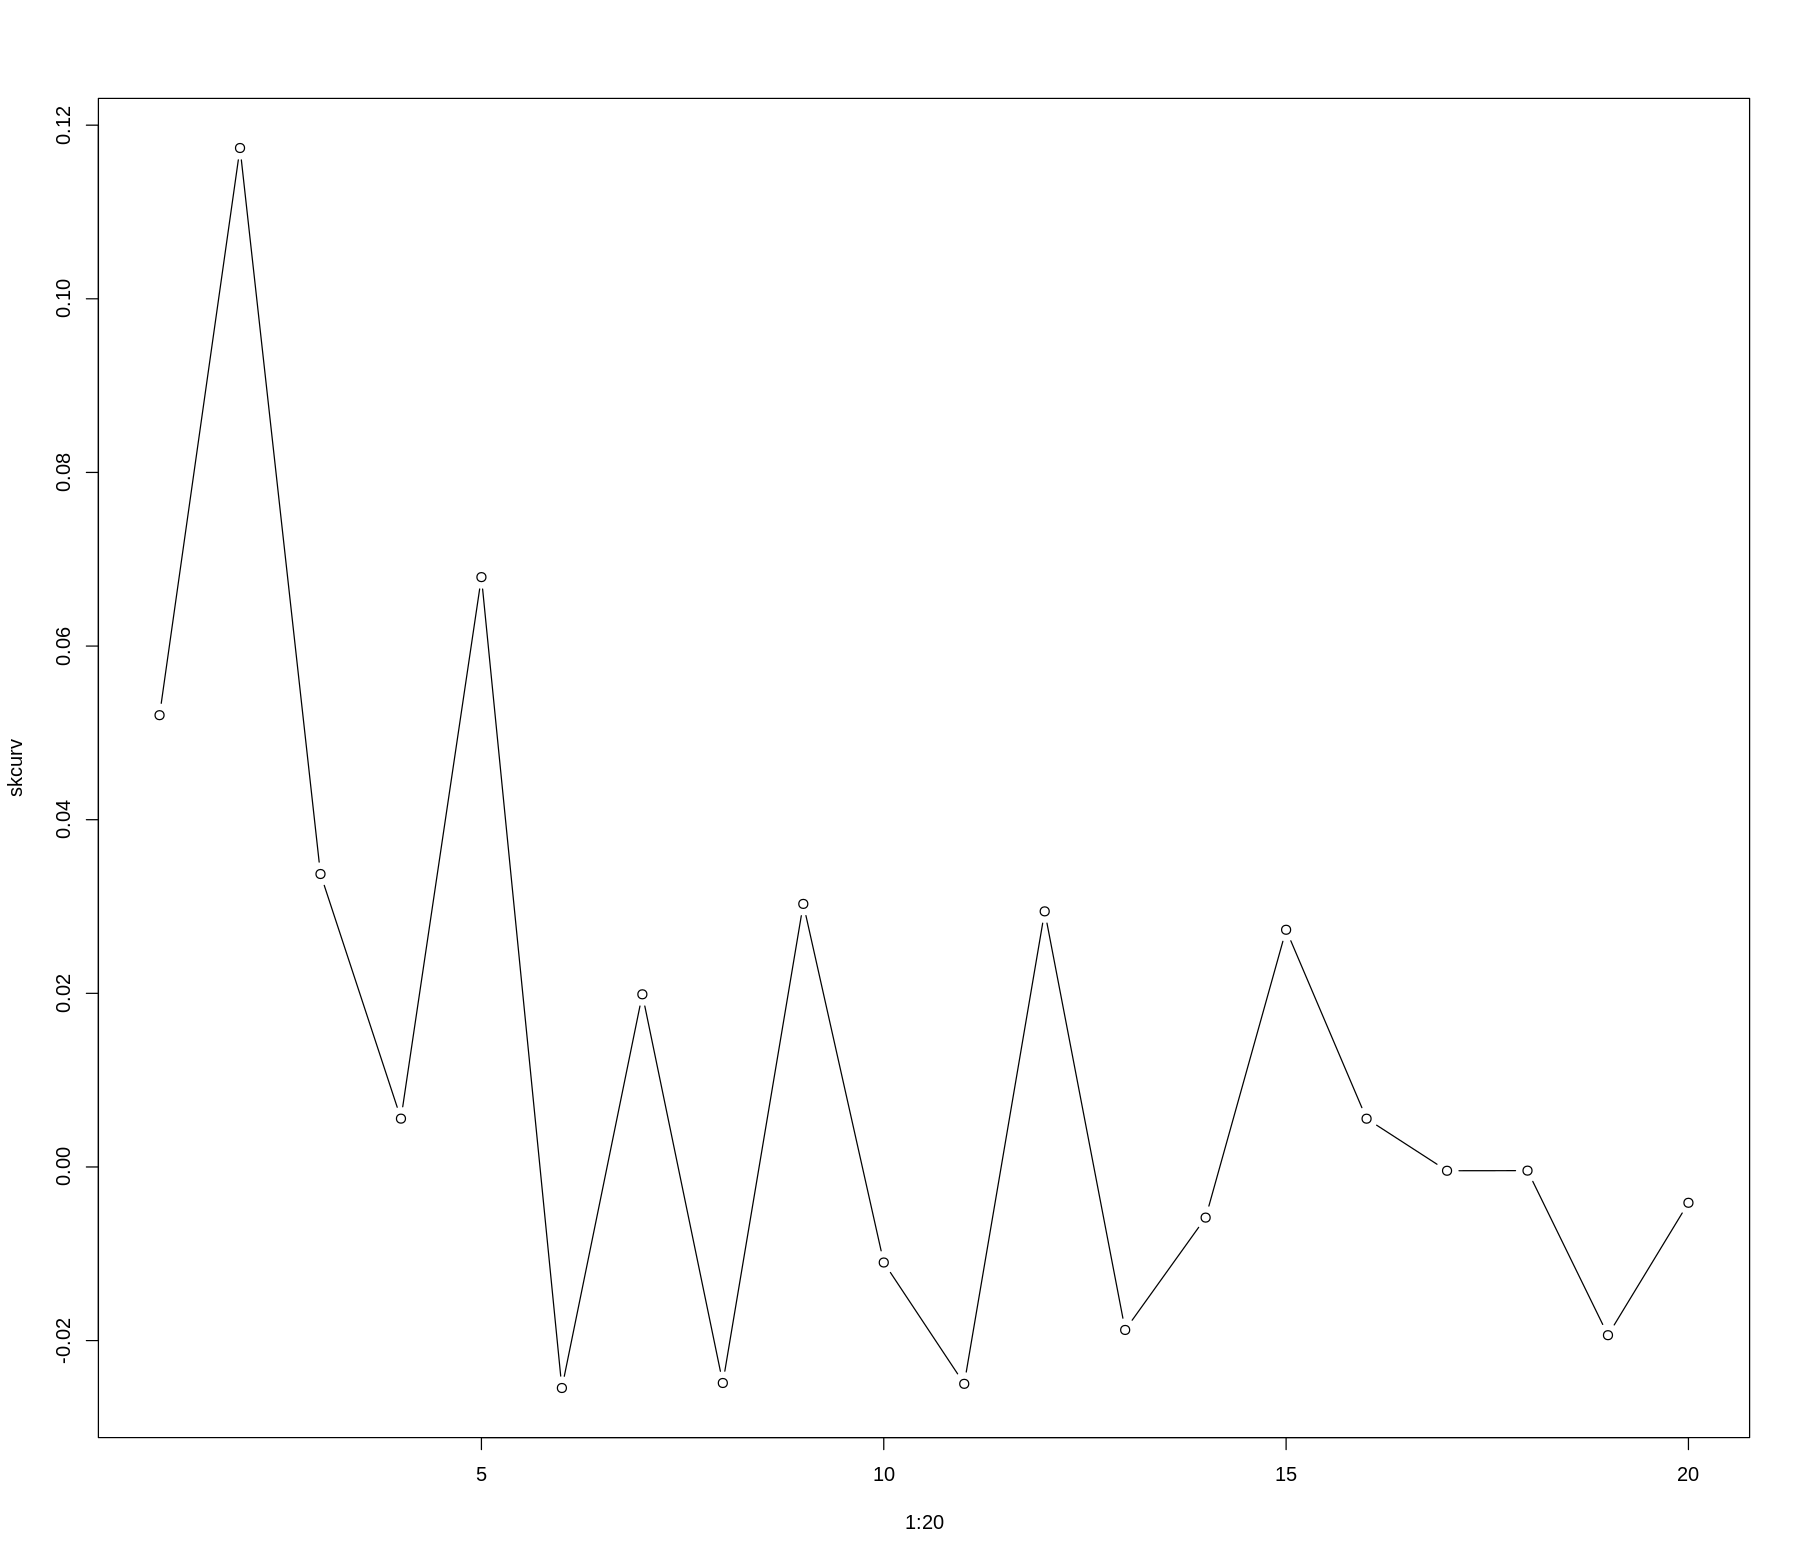

In [ ]:
# scegliamo uno spazio LSA con piu' dimensioni e quindi con minore perdita d'informazione.
# Individuamo il punto di knee nella sequenza degli autovalori visualizzati in precedenza
# tra i minimi locali della funzione di curvatura sottodefinita della sequenza di autovalori
fordiff <- function(x) x[2:length(x)] - x[1:(length(x)-1)]
skd <- fordiff(lsar$sk)
skdd <- fordiff(skd)
skcurv <- skdd[1:20] / (1+(skd[1:20])^2)^1.5
plot( 1:20, skcurv, type="b" )


In [ ]:
# il primo minimo locale e' 4, perciò selezioniamo le prime 4 dimensioni dello spazio LSA
# ed estraiamo da questo spazio i primi 10 doc semanticamente piu' simili alla query
tweets[top(cosines(dls[,1:4], lilos[1:4]), 10)]
# ora in ogni doc visualizzato le cause indicano cattive condizioni meteo, anche nei doc come

[1] "i hate all shopping when i feel rushed by hoards of people"                                                                                                                                                                                                             
 [2] "i feel the divine envelope me when i watch literally hundreds of faithful at mass in line for eucharist hundreds of people who include professors homeless bankers students rich poor mentally ill healthy conservatives liberals gay straight sweet rude arrogant kind"
 [3] "i feel that at shows and around show horses people are trusting and relaxed because most show horses are safe and quiet and are handled frequently"                                                                                                                     
 [4] "i feel about puppy mills puppy mills are run by greedy people who do not care about the quality of life for animals"                                                                                                                                                    
 [5] "i giggle nervously when i feel threatened"                                                                                                                                                                                                                              
 [6] "i am most defensive when i feel most threatened"                                                                                                                                                                                                                        
 [7] "i feel distracted when people think i m overreacted"                                                                                                                                                                                                                    
 [8] "i love doing kim kardashion make up tutorials i always feel so glamorous with all that make up on"                                                                                                                                                                      
 [9] "i feel safe beautiful and appreciated"                                                                                                                                                                                                                                  
[10] "i feel she was wronged"

In [ ]:
# Per determinare se esiste una correlazione tra love life e joy emotions con un
# modello di ricerca semantico basato su ranking, come quello sopra definito, occorre, a differenza
# del modello di ricerca booleano basato su match lessicale analizzato in precedenza, fissare
# il numero massimo di risultati restiuiti dal modello di ricerca da considerare (R-precision)
# Questo numero e' dato dalla numerosita' degli text emotions distruttivi nell'intero dataset degli
# emotions. Calcoliamo percio' la distribuzione della classe degli emotions nei primi k risultati
# della ricerca con k=10, 50, 100, 482 (=num. totale emotion texts nel dataset, 15%)
table(sentiment[top(cosines(dls[,1:4],lilos[1:4]), 10)])
table( sentiment )
table( sentiment[ top( cosines( dls[,1:4], lilos[1:4] ), 2000 ) ] ) # 803 distruttivi osservati su 2000 attesi (15% di 2000)
loli.vs.joy <- table(1:nrow(dls) %in% top(cosines(dls[,1:4], lilos[1:4]), 2000), sentiment=="joy" )
dimnames(loli.vs.joy) <- list(loli = c("No", "Si"), joy = c("No", "Si"))
loli.vs.joy
# 803 joy restituiti su 72 attesi in 2000 incidenti,
# indicano o meno correlazione tra life love e joy emotions ?



anger  fear   joy 
    4     2     4 

sentiment
anger  fear   joy 
 2000  1937  2000 


anger  fear   joy 
  644   553   803 

    joy
loli   No   Si
  No 2740 1197
  Si 1197  803

In [ ]:
# Rispondiamo alla domanda eseguendo una verifica oggettiva mediante test chiquadro
chisq.test( loli.vs.joy, correct=FALSE )
# risultato: 56.364, df = 1, p-value < 5.931e-16
# ossia la prob. che la coppia di termini life love NON sia semanticamente correlata
# agli emotion joy e' 5.931e-16
# percio' le amore e life enviroment(state) contribuiscono a provocare quasi il 40% of joy
# distruttivi (40%)  (803/2000)



	Pearson's Chi-squared test

data:  loli.vs.joy
X-squared = 56.394, df = 1, p-value = 5.931e-14


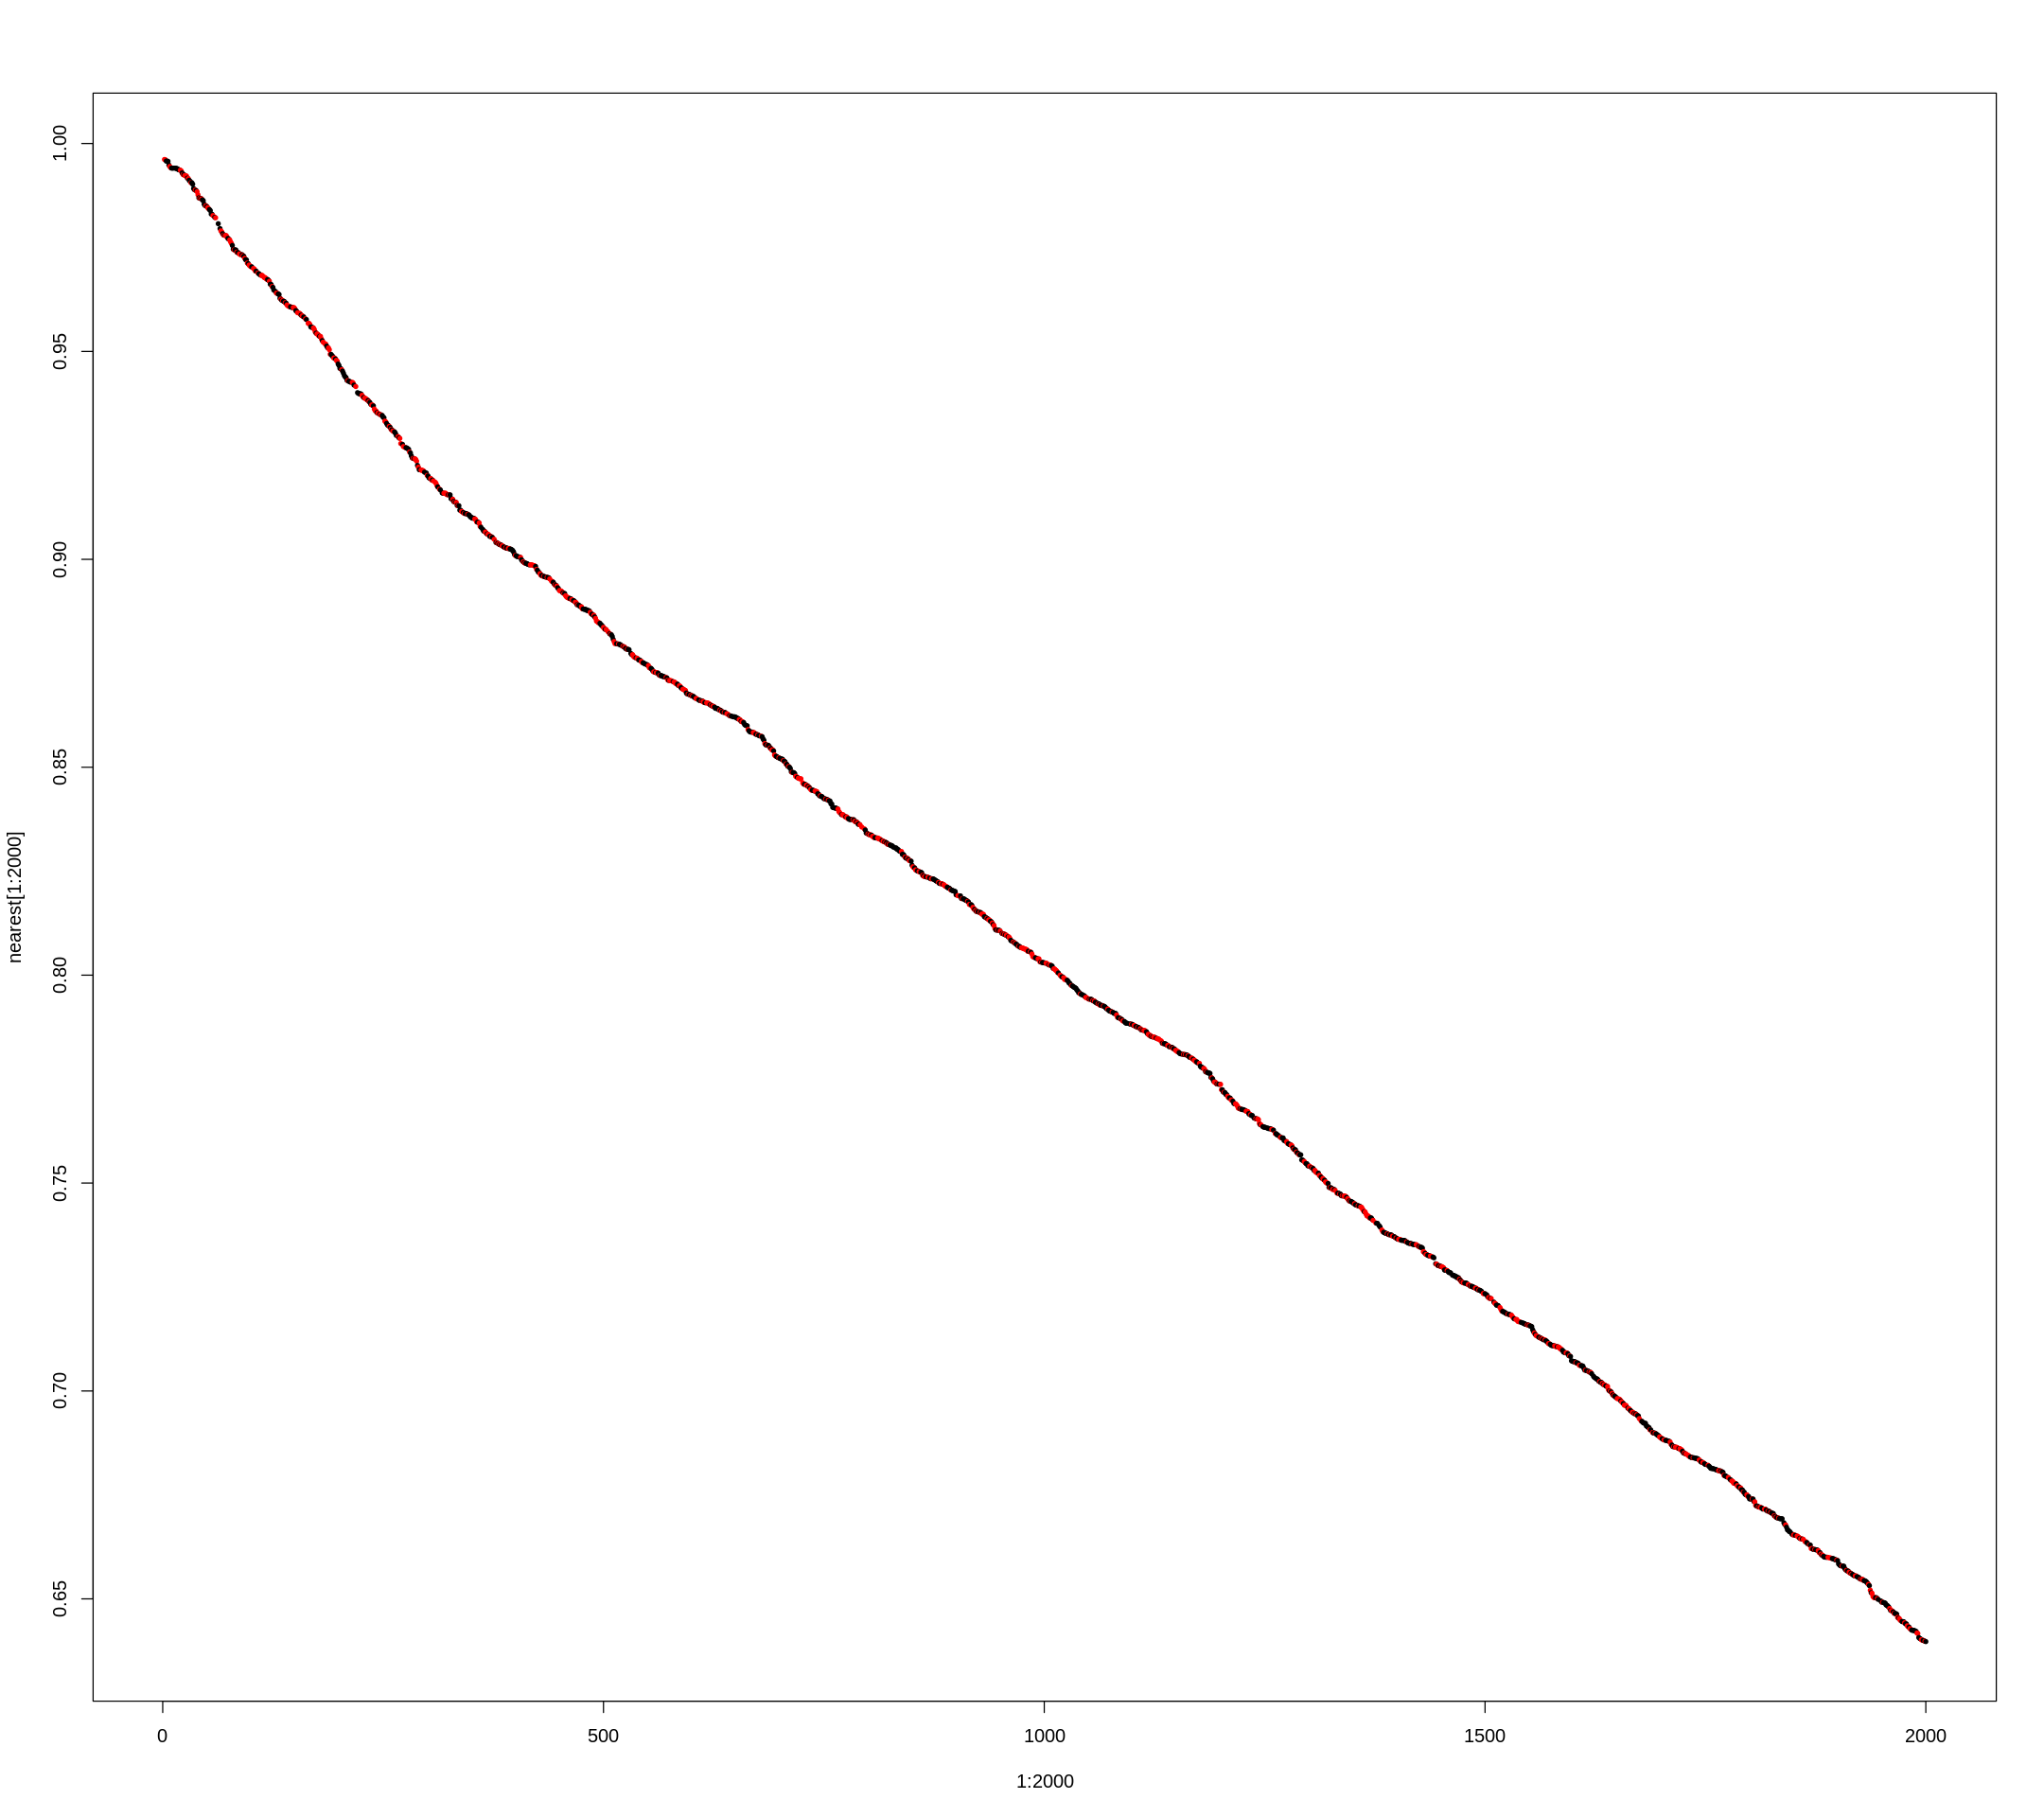

In [ ]:
# Verifichiamo come le classi di incidenti sono distribuite nel risultato di ricerca semantica
# rispetto alle cattive condizioni meteo
# ordina i rapporti sugli incidenti aerei per rilevanza semantica decrescente rispetto alla query lilos
nearest <- sort( cosines( dls[,1:4], lilos[1:4] ), decreasing=T )

emocols2 <- rep( "black", 5189 ) # crea lista con 5189 volte la parola black
emocols2[ sentiment == "joy" ] <- "red" # pone a red i joy emotions

plot( 1:2000, nearest[1:2000], pch=20, cex=0.7, col=emocols2[strtoi(names(nearest))] )
# nel grafico gli joy texts sono rappresentati in rosso e si nota una loro maggiore
# concentrazione tra i primi documenti del risultato di ricerca. Questo indica che gli texts of
# joy sono quelli con maggiore similarita' semantica con la query life love.


In [ ]:

# Ora vogliamo individuare, se esistono, delle cause piu' specifiche di questi joy
# legati alle love, percio' iteriamo il metodo sopra esposto cercando nello spazio
# LSA a 4 dimensioni quali altri termini sono semanticamente piu' correlati alla coppia life love
# percio' dobbiamo applicare il calolco della similarita' semantica tra una query e un termine
tksrs <- lsar$tk %*% diag( sqrt( lsar$sk ) )
awdksrs <- lilos %*% diag( lsar$sk^-0.5 )

# elenco dei termini in ordine crescente di similarita' semantica con la coppia averse weather
sort( cosines( tksrs[,1:4], awdksrs[1:4] ) )
# coseno tra -1 e 1 perché lo spazio vettoriale comprende anche i quadranti negativi


cranky        typing         dizzy       tonight           coz 
-0.4742644012 -0.4709489381 -0.4595844749 -0.4297870245 -0.4257553566 
      festive         shaky         lunch           bit         today 
-0.4138113638 -0.4106193341 -0.4099278334 -0.4070033739 -0.4058161005 
       hungry           sat          bird          shut         right 
-0.4027745374 -0.3989022209 -0.3900544025 -0.3823211500 -0.3799516130 
        video          woke       grouchy           tad    indecisive 
-0.3760711809 -0.3740448445 -0.3701175554 -0.3630489233 -0.3502268520 
       sunday     challenge         count        fairly     irritable 
-0.3499598025 -0.3399897997 -0.3386311955 -0.3296072551 -0.3198362581 
         busy           now     beginning          rain      position 
-0.3158623063 -0.3143598134 -0.3139743736 -0.3138130131 -0.3133911681 
         late        throat      recently         trees        mellow 
-0.3057039186 -0.2990299050 -0.2979926228 -0.2908258523 -0.2847452268 
    depressed    optimistic     yesterday        little       waiting 
-0.2837996857 -0.2831827413 -0.2827130183 -0.2814505674 -0.2789415792 
      confess         cried           ran        skills         drove 
-0.2753799074 -0.2731613913 -0.2718708909 -0.2674569067 -0.2657947819 
     nauseous          left      sociable          smug       playful 
-0.2455141494 -0.2422824059 -0.2417171898 -0.2412667995 -0.2406801686 
          got         didnt       watched      somewhat        lately 
-0.2338280959 -0.2316791018 -0.2307804005 -0.2297737219 -0.2290781637 
          top       anxious        really       annoyed      birthday 
-0.2229185098 -0.2204742244 -0.2171772533 -0.2163057859 -0.2156434458 
 apprehensive       feeling           lol          went    complacent 
-0.2153571335 -0.2140897191 -0.2105499620 -0.2091246887 -0.2020733222 
      alarmed        headed        seemed       entered      saturday 
-0.2010017381 -0.1999590253 -0.1937409408 -0.1924861828 -0.1896793719 
      hostile        grumpy         badly       project         awful 
-0.1892855703 -0.1879103727 -0.1867587891 -0.1846842927 -0.1813174858 
     hesitant      generous      stressed         began   adventurous 
-0.1812680309 -0.1809231920 -0.1804983970 -0.1784463195 -0.1693453433 
    listening      despised          tend        handle         crazy 
-0.1670586289 -0.1664921747 -0.1649305858 -0.1625060942 -0.1618096172 
        tired     energetic   overwhelmed       relaxed        shaken 
-0.1613605344 -0.1609319224 -0.1559230415 -0.1549771616 -0.1517650138 
   rebellious        unsure       nervous      agitated      blogging 
-0.1517510640 -0.1503863192 -0.1488752799 -0.1488186226 -0.1460517263 
       unable      spiteful          week          tiny          tree 
-0.1453645660 -0.1450149012 -0.1443329243 -0.1442582347 -0.1394700233 
      morning       decided           sad      restless          bike 
-0.1388531535 -0.1331212222 -0.1317167585 -0.1307560165 -0.1304887645 
       eating     wondering       changed         eager       student 
-0.1301777388 -0.1298515837 -0.1261073673 -0.1258465919 -0.1233441111 
      suppose       holiday         month      cleaning      answered 
-0.1232157266 -0.1229213126 -0.1216119461 -0.1199457698 -0.1181922914 
     virtuous       awfully         ready       noticed        missed 
-0.1181826191 -0.1166684802 -0.1160677771 -0.1146358072 -0.1139843057 
         goal         brown         blogs         night         party 
-0.1109275184 -0.1082101502 -0.1080997875 -0.1071784640 -0.1051750594 
      wanting          keen     fantastic      horrible         usual 
-0.1030066815 -0.1024060385 -0.1020000080 -0.0975769771 -0.0961829130 
    confident          mood     following           amp          took 
-0.0935420669 -0.0932432527 -0.0904664248 -0.0900918010 -0.0897077156 
        guess        wanted           due        babies        window 
-0.0858325081 -0.0857289830 -0.0851229171 -0.0819330319 -0.0806515109 
        paper           mad    

In [ ]:

# scegliamo i termini con elevata similarità coseno e norma massima, percio' estraiamo la norma
# di quelli con similarita' cosine ad adverse weather maggiore di 0.99
tnorms4 <- apply( tls[,1:4], 1, norm, "2" )
tnorms4[cosines(tksrs[,1:4],awdksrs[1:4])>0.99] # instrument ha norma piu' alta, i.e. piu' rilevante


people     hearts 
1.98132729 0.07177971

In [ ]:
# definizione funzione per velocizzare il calcolo della similarita' tra query e termini in LSA
makequery <- function(Q, TDM, LSA) {
  V <- query( Q, rownames(TDM) )
  W <- lw_logtf(V) * (1-entropy(TDM))
  LS <- t(W) %*% LSA$tk
  DK <- LS %*% diag(LSA$sk^-1)
  DKSRS <- DK %*% diag(sqrt(LSA$sk))
  list( query=Q, bin=V, v=W, dk=DK, ls=LS, dksrs=DKSRS )
}


In [ ]:
awi <- makequery( "life love hearts", tdm, lsar )
tweets[top(cosines(dls[,1:4],awi$ls[1:4]),10)] # primi 10 rapporti più rilevanti per la nuova query
table( sentiment[ top( cosines( dls[,1:4], awi$ls[1:4] ), 482 ) ] )


[1] "i hate all shopping when i feel rushed by hoards of people"                                                                                                                                                                                                             
 [2] "i feel that at shows and around show horses people are trusting and relaxed because most show horses are safe and quiet and are handled frequently"                                                                                                                     
 [3] "i feel about puppy mills puppy mills are run by greedy people who do not care about the quality of life for animals"                                                                                                                                                    
 [4] "i do feel slighted when some people use their piece of the cyber world to be rude towards me"                                                                                                                                                                           
 [5] "i feel distracted when people think i m overreacted"                                                                                                                                                                                                                    
 [6] "i giggle nervously when i feel threatened"                                                                                                                                                                                                                              
 [7] "i am most defensive when i feel most threatened"                                                                                                                                                                                                                        
 [8] "when i saw all the starving people in ethiopia on tv it felt awful to see such suffering"                                                                                                                                                                               
 [9] "i feel the divine envelope me when i watch literally hundreds of faithful at mass in line for eucharist hundreds of people who include professors homeless bankers students rich poor mentally ill healthy conservatives liberals gay straight sweet rude arrogant kind"
[10] "i buy books about people i feel are equally fucked up as i am or books about zen approaches to shitty situations"


anger  fear   joy 
  152   115   215 

In [ ]:
# calcoliamo quanti doc ci sono in comune tra quest'ultima query piu' specifica e la query life love
#  1954 in comune su 2000, quindi il risultato e' il medesimo anche aggiungendo hearts
length(intersect(top(cosines(dls[,1:4], awls[1:4]), 2000), top(cosines(dls[,1:4], awi$ls[1:4]), 2000)))


[1] 1954

In [ ]:
# scegliamo il 4° termine da aggiungere alla query
sort( cosines( tksrs[,1:4], awi$dksrs[1:4] ) )
tnorms4[cosines(tksrs[,1:4],awi$dksrs[1:4])>0.99] # con la norma piu' alta


cranky        typing         dizzy       tonight           coz 
-0.4922477086 -0.4856895625 -0.4787622576 -0.4458003663 -0.4451672599 
      festive         lunch         shaky           bit        hungry 
-0.4300592307 -0.4292248675 -0.4276162888 -0.4247110420 -0.4233526797 
        today           sat          shut          bird         right 
-0.4223798413 -0.4179780395 -0.4034740139 -0.4032370840 -0.3964454682 
        video          woke       grouchy           tad    indecisive 
-0.3960292105 -0.3885485703 -0.3832831166 -0.3826497673 -0.3718888016 
       sunday     challenge         count        fairly     irritable 
-0.3639069876 -0.3590164961 -0.3570061313 -0.3476799193 -0.3369369939 
         busy          rain     beginning           now      position 
-0.3319706572 -0.3318396524 -0.3316943051 -0.3299252871 -0.3291418265 
         late        throat      recently         trees     yesterday 
-0.3261737547 -0.3150747244 -0.3105541253 -0.3078037695 -0.3032035286 
       mellow     depressed    optimistic       waiting        little 
-0.3030276095 -0.3004835843 -0.3000159870 -0.2965168633 -0.2957424195 
        cried       confess           ran        skills         drove 
-0.2901625634 -0.2871993943 -0.2860397780 -0.2858763329 -0.2774466282 
     nauseous      sociable       playful          smug          left 
-0.2628480759 -0.2614244001 -0.2604072633 -0.2600018906 -0.2585125940 
        didnt      somewhat           got           top        lately 
-0.2528075896 -0.2518490985 -0.2508646563 -0.2456156066 -0.2449101366 
      watched       annoyed       anxious        really      birthday 
-0.2445471010 -0.2372010020 -0.2359989036 -0.2347588164 -0.2325581489 
      feeling           lol  apprehensive          went       alarmed 
-0.2312803741 -0.2301129607 -0.2278030125 -0.2271954003 -0.2210070043 
       headed    complacent        seemed       entered        grumpy 
-0.2194182264 -0.2157157943 -0.2130470608 -0.2094967670 -0.2090124239 
      hostile       project         badly      saturday      hesitant 
-0.2065761700 -0.2047499204 -0.2039879031 -0.2031016983 -0.2024694275 
        awful      stressed      generous         began     listening 
-0.2024331665 -0.1977806456 -0.1975542733 -0.1963180832 -0.1887919878 
  adventurous      despised          tend         tired         crazy 
-0.1862378084 -0.1843967720 -0.1842289997 -0.1839435634 -0.1817463316 
      relaxed     energetic        handle   overwhelmed    rebellious 
-0.1770695187 -0.1760432455 -0.1727704373 -0.1725661806 -0.1710993529 
       shaken        unsure        unable      spiteful       nervous 
-0.1703602530 -0.1688484131 -0.1685384636 -0.1677165410 -0.1671198965 
     agitated      blogging          tiny          week           sad 
-0.1666820056 -0.1645954263 -0.1594368361 -0.1584009792 -0.1547947772 
         tree       morning        eating         eager       student 
-0.1540037543 -0.1537471089 -0.1488598457 -0.1485334016 -0.1463571144 
    wondering       decided       suppose      restless          bike 
-0.1443974943 -0.1435243248 -0.1429244040 -0.1425643865 -0.1401843946 
     answered      virtuous       changed      cleaning         month 
-0.1391833379 -0.1382953711 -0.1376597597 -0.1370363027 -0.1347207262 
      noticed        missed       holiday          goal       awfully 
-0.1344548064 -0.1342450067 -0.1330615459 -0.1319871135 -0.1316420587 
        blogs         ready         brown         party         night 
-0.1309752278 -0.1283167756 -0.1265799862 -0.1242610335 -0.1220725963 
      wanting      horrible          keen     fantastic           amp 
-0.1212411089 -0.1200361318 -0.1199432846 -0.1145691775 -0.1124010922 
         took          mood         guess        wanted         usual 
-0.1108921144 -0.1105402898 -0.1092257277 -0.1073103078 -0.1069102235 
    following     confident           due        window           mad 
-0.1064471857 -0.1063406305 -0.1037174513 -0.1019555094 -0.1010081408 
       babies         paper    

people     hearts 
1.98132729 0.07177971

In [ ]:
# rieseguiamo la query aggiungendo ad essa metereological
awim <- makequery( "life love heart chocolate", tdm, lsar )
# 1858 doc in comune su 2000, quindi ancora il risultato e' il medesimo aggiungendo chocolate
table( sentiment[ top( cosines( dls[,1:4], awim$ls[1:4] ), 2000 ) ] ) #
length(intersect(top(cosines(dls[,1:4], lilos[1:4]), 2000), top(cosines(dls[,1:4], awim$ls[1:4]), 2000)))



anger  fear   joy 
  635   571   794 

[1] 1858

In [ ]:
# scegliamo il 5° termine da aggiungere alla query
sort( cosines( tksrs[,1:4], awim$dksrs[1:4] ) )
tnorms4[cosines(tksrs[,1:4],awim$dksrs[1:4])>0.99] # e' continued


bird           coz         right        typing         dizzy 
-0.4192201545 -0.4062229055 -0.4022715465 -0.3967807620 -0.3917703277 
        video        cranky           tad      position           now 
-0.3849311601 -0.3783405684 -0.3467678098 -0.3462087555 -0.3331246355 
       hungry          shut        throat         lunch       festive 
-0.3329073903 -0.3174629707 -0.3138874084 -0.3047140386 -0.3034449337 
        count       tonight           sat        really         shaky 
-0.2983969663 -0.2969433971 -0.2938991160 -0.2901496812 -0.2888095287 
     sociable         today           bit    indecisive     challenge 
-0.2868657565 -0.2858786474 -0.2799872794 -0.2790603198 -0.2720064850 
        badly           lol        handle           got       grouchy 
-0.2629842772 -0.2537504991 -0.2536203132 -0.2494047874 -0.2402409193 
         rain        fairly         didnt          woke      despised 
-0.2342482330 -0.2276057748 -0.2263051852 -0.2253884136 -0.2218608240 
         busy     irritable        sunday         crazy      recently 
-0.2200469173 -0.2129981765 -0.2118009304 -0.2062199597 -0.2020283411 
         late           top        skills     beginning         trees 
-0.1974530646 -0.1935527885 -0.1898726313 -0.1876096546 -0.1826040963 
    yesterday         cried      somewhat        mellow     depressed 
-0.1810737886 -0.1760887832 -0.1731304210 -0.1691394407 -0.1620639436 
       lately    optimistic         north         drove       hostile 
-0.1525224321 -0.1521135347 -0.1466583742 -0.1438363365 -0.1423608199 
     artistic       waiting         games        little           ran 
-0.1402619583 -0.1394033239 -0.1356001647 -0.1257188234 -0.1256280253 
         smug       entered       playful        headed       wanting 
-0.1246956247 -0.1230123025 -0.1173723631 -0.1153996569 -0.1153489065 
      project      stressed          went       annoyed       confess 
-0.1149319614 -0.1118480893 -0.1106556381 -0.1092050856 -0.1082693016 
       unable          idea         tired       changed         paper 
-0.1078607465 -0.1066259945 -0.1043908962 -0.1002190161 -0.1000597781 
        awful          left      nauseous      horrible          just 
-0.0981999236 -0.0979353870 -0.0979085373 -0.0976941321 -0.0968639054 
      watched     listening        eating        spirit           mad 
-0.0958471131 -0.0954006141 -0.0919987266 -0.0917056483 -0.0913194340 
     birthday        seemed        shaken       alarmed    rebellious 
-0.0880968419 -0.0875783383 -0.0854646495 -0.0841122956 -0.0838357067 
     spiteful         phone         eager    complacent        grumpy 
-0.0807972754 -0.0794937374 -0.0773108625 -0.0764601797 -0.0759681954 
      feeling           sad      hesitant        missed          mood 
-0.0757415506 -0.0754816616 -0.0709258869 -0.0707953421 -0.0698973326 
      student          weve          tend       relaxed          keen 
-0.0697565127 -0.0695337208 -0.0691724650 -0.0682314321 -0.0651272011 
         thin       anxious  apprehensive         guess      realized 
-0.0643507290 -0.0638261606 -0.0442453711 -0.0441634445 -0.0434913705 
   struggling      cleaning           ive      saturday      generous 
-0.0414355660 -0.0404790792 -0.0386187472 -0.0380688140 -0.0379288345 
        blogs         began          bike          tiny     breathing 
-0.0366036887 -0.0352716973 -0.0351482012 -0.0329286871 -0.0316965280 
         goal  particularly       morning          isnt     energetic 
-0.0315413046 -0.0256749647 -0.0256224962 -0.0248769057 -0.0247950521 
        brain          news   adventurous       quickly          calm 
-0.0242121485 -0.0230993491 -0.0218638514 -0.0213312171 -0.0203146907 
     blogging       nervous       kitchen         throw       suppose 
-0.0193807357 -0.0178915365 -0.0176342332 -0.0169791423 -0.0165850072 
     answered   overwhelmed     confident         party          tree 
-0.0164412892 -0.0151709007 -0.0135514879 -0.0134053076 -0.0125871905 
     specific      neurotic      

allow       rule     rarely      jesus 
0.14766008 0.07771838 0.04669906 0.06302012

In [ ]:
# rieseguiamo la query aggiungendo ad essa continued
awimc <- makequery( "life love heart chocolate fun", tdm, lsar )
# 1867 doc in comune su 2000, quindi ancora il risultato e' il medesimo aggiungendo fun
table( sentiment[ top( cosines( dls[,1:4], awimc$ls[1:4] ), 2000 ) ] ) #
length(intersect(top(cosines(dls[,1:4], lilos[1:4]), 2000), top(cosines(dls[,1:4], awimc$ls[1:4]), 2000)))



anger  fear   joy 
  641   570   789 

[1] 1867

In [ ]:
# scegliamo il 6° termine da aggiungere alla query
sort( cosines( tksrs[,1:4], awimc$dksrs[1:4] ) )
tnorms4[cosines(tksrs[,1:4],awimc$dksrs[1:4])>0.99] # e' share


typing          bird         right        cranky         dizzy 
-0.3885146672 -0.3851536878 -0.3432940283 -0.3413087004 -0.3390107126 
          coz         video      position       festive           now 
-0.3359234495 -0.2925349891 -0.2918486733 -0.2904911180 -0.2891720891 
      tonight           tad         today        throat         shaky 
-0.2800600671 -0.2783989729 -0.2695731964 -0.2687218178 -0.2668110634 
        count       grouchy         lunch           sat           bit 
-0.2558832762 -0.2557199925 -0.2555567656 -0.2502805975 -0.2455919837 
       hungry     challenge      recently          woke        sunday 
-0.2359911726 -0.2315729509 -0.2235991101 -0.2227883968 -0.2208757988 
         shut          busy        handle          rain        fairly 
-0.2198446678 -0.2134428593 -0.2110346098 -0.2079030712 -0.2025513267 
    irritable           got    indecisive        really         drove 
-0.1982590061 -0.1978620286 -0.1912986585 -0.1807023912 -0.1754606442 
     sociable         trees     beginning         cried        skills 
-0.1724504069 -0.1706243858 -0.1646591035 -0.1639014928 -0.1617447384 
        badly     depressed           lol        lately        mellow 
-0.1591519311 -0.1528523530 -0.1517207579 -0.1482425959 -0.1441386638 
        didnt    optimistic           ran      despised     yesterday 
-0.1414062971 -0.1398923768 -0.1351683744 -0.1350580009 -0.1293424323 
       little       confess          late       hostile       changed 
-0.1286070591 -0.1261414137 -0.1255167112 -0.1188734494 -0.1143766500 
      waiting       watched       entered      somewhat          smug 
-0.1140175861 -0.1128228565 -0.1085329682 -0.0984316354 -0.0970272334 
   complacent      stressed           top          went        spirit 
-0.0958912687 -0.0952230768 -0.0929500409 -0.0914917756 -0.0898073882 
         left      artistic        headed          bike      birthday 
-0.0896708402 -0.0816942475 -0.0811562553 -0.0804899327 -0.0792419229 
        crazy          idea       playful       project         north 
-0.0736743754 -0.0732586897 -0.0724003256 -0.0720633527 -0.0714408799 
     nauseous           ive       feeling       wanting        shaken 
-0.0679308265 -0.0678950111 -0.0610913492 -0.0590623512 -0.0574255930 
       seemed      saturday       anxious        eating       annoyed 
-0.0567161436 -0.0557676100 -0.0555248464 -0.0547464868 -0.0545085818 
 apprehensive    rebellious         awful       alarmed          tiny 
-0.0542293612 -0.0490360761 -0.0453542679 -0.0419039856 -0.0416513660 
         mood          tend          keen       morning         games 
-0.0400194662 -0.0392203073 -0.0384809706 -0.0368281915 -0.0364155714 
    confident     listening     energetic       decided         usual 
-0.0360699903 -0.0333071939 -0.0329243648 -0.0326856431 -0.0312717702 
     cleaning         ready      generous          tree         tired 
-0.0296427797 -0.0292743092 -0.0290445727 -0.0268061369 -0.0257364848 
      holiday        missed          week       awfully      restless 
-0.0254284042 -0.0202741793 -0.0194971188 -0.0175820283 -0.0162995889 
        night        grumpy         began         mouth       quickly 
-0.0157177943 -0.0134698885 -0.0101236745 -0.0099437922 -0.0081639088 
  overwhelmed   adventurous     fantastic         month      spiteful 
-0.0080433336 -0.0076283482 -0.0073338753 -0.0025388992 -0.0021845726 
      relaxed        unable      hesitant       nervous      blogging 
-0.0011435998 -0.0003446485  0.0004896817  0.0032618225  0.0038455387 
     horrible       settled          thin          last           sad 
 0.0070540806  0.0074760439  0.0105771972  0.0117027830  0.0129122595 
        party       suppose       student          goal         spent 
 0.0130688813  0.0162784740  0.0165063640  0.0182325792  0.0225917645 
     sunshine        unsure     wondering           mad         brown 
 0.0231245692  0.0236870905  0.0253303984  0.0253967031  0.0256675382 
      general    struggling    

rule     rarely 
0.07771838 0.04669906

In [ ]:
# rieseguiamo la query aggiungendo ad essa VFR
awimcv <- makequery( "life love heart chocolate fun share", tdm, lsar )
# 1805 doc in comune su 2000, quindi ancora il risultato e' il medesimo aggiungendo share
table( sentiment[ top( cosines( dls[,1:4], awimcv$ls[1:4] ), 2000 ) ] ) #
length(intersect(top(cosines(dls[,1:4], lilos[1:4]), 2000), top(cosines(dls[,1:4], awimcv$ls[1:4]), 2000)))



anger  fear   joy 
  660   573   767 

[1] 1805

In [ ]:
# in conclusione la causa che contribuisce a il 40% degli joy emotions
# e' la combinazione di love, life and its conditions and having fun while sharing chocolate
# Queste cause sono le stesse emerse dall'analisi sul report del dataset

loli.vs.joy <- table(1:nrow(dls) %in% top(cosines(dls[,1:4], awimcv$ls[1:4]), 2000), sentiment=="joy" )
dimnames(loli.vs.joy) <- list(life_love_heart_chocolate_fun = c("No", "Si"), joy = c("No", "Si"))
loli.vs.joy

# 767 joy emotion detected su 673 attesi in 2000 reports (2000-precision),

# Rispondiamo alla domanda eseguendo una verifica oggettiva mediante test chiquadro
c = chisq.test( loli.vs.joy, correct=FALSE )
c$expected
c$observed
c$p.value
c$method
c$parameter


                             joy
life_love_heart_chocolate_fun   No   Si
                           No 2704 1233
                           Si 1233  767

joy
life_love_heart_chocolate_fun No       Si       
                           No 2610.741 1326.2591
                           Si 1326.259  673.7409

                             joy
life_love_heart_chocolate_fun   No   Si
                           No 2704 1233
                           Si 1233  767

[1] 6.02393e-08

[1] "Pearson's Chi-squared test"

df 
 1